# Covid19 - Brazil (Cities) Basic Geographic Analysis
- by Marcelo Rovai
- 21 April 2020

## Main Libraries and setup

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.graph_objs as go
import geopandas as gpd
from shapely.geometry import Point, Polygon
from unicodedata import normalize
import datetime
from PIL import Image
import imageio
import glob
from bs4 import BeautifulSoup
import time
import requests

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [144]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.float_format = '{:,}'.format
mpl.rcParams['figure.dpi']= 150
plt.style.use('seaborn-paper')

## General Functions 

In [145]:
def plot_cases(data, city, n_0=100, y_scale='log', mov=3):
    data = data[data.city == city]
    tst = data[data.totalCases >= n_0]
    tst['MA_3'] = tst.iloc[:,-2].rolling(window=mov).mean()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tst.date, y=round(tst.totalCases), name='Total Cases'))
    fig.add_trace(go.Scatter(x=tst.date, y=round(tst.MA_3), name='New Cases'))
    fig.add_trace(go.Scatter(x=tst.date, y=round(tst.deaths), name='Deaths'))
    fig.update_layout(
        title='Covid-19 Brazil ({}) - Cases over {:,} - Y-scale: {} - {}/{}/{}'.
        format(city, n_0, y_scale, date.year, date.month, date.day),
        xaxis_title="Day",
        yaxis_title="# Cases",
        yaxis_type=y_scale)
    #city = city.replace('/', '-')
    #fig.write_image('../images/!_1_cv19_Brazil_'+city+'_CV_Evolution_Graph_updated.png')
    fig.show()

In [146]:
def data_cleanup(array):
    L = []
    for i in array:
        i = i.replace("+","")
        i = i.replace("-","")
        i = i.replace(",",".")
        if i == "":
            i = "0"
        L.append(i.strip())
    return L

In [147]:
def get_wordometers_covid(country, worldmetersLink):
    today = datetime.datetime.today()
    try:
        html_page = requests.get(worldmetersLink)
    except requests.exceptions.RequestException as e: 
        print(e) #ConnectionError
    bs = BeautifulSoup(html_page.content, 'html.parser')
    search = bs.select("div tbody tr td")
    start = -1
    for i in range(len(search)):
        if search[i].get_text().find(country) !=-1:
            start = i
            break
    data = []
    for i in range(1,8):
        try:
            data = data + [search[start+i].get_text()]
        except:
            data = data + ["0"]

    data = data_cleanup(data)

    Total_infected = data[0]
    New_Cases = data[1]
    Total_Deaths = data[2]
    New_Deaths = data[3] 
    Recovred = data[4] 
    Active_Case = data[5] 
    Serious_Critical = data[6]

    print('\n{} - Worldometers Daily Data\n'.format(country))
    print(
        "Today is {} \n- Total infected = {} \n- New Cases = {} \n- Total Deaths = {} \n- New Deaths = {} \n- Recovered = {} \n- Active Cases = {} \n- Serious-Critical = {}"
        .format(today, *data))
    return data

## Datasets

### Worldometers Daily Data

- Based on TDS article: [Track Coronavirus in Your Country by Displaying Notifications Using Python](https://towardsdatascience.com/coronavirus-track-coronavirus-in-your-country-by-displaying-notification-c914b5652088)

In [148]:
worldmetersLink = "https://www.worldometers.info/coronavirus/"

In [152]:
data_wd_covid_br = get_wordometers_covid('World', worldmetersLink)


World - Worldometers Daily Data

Today is 2020-04-23 17:44:17.956569 
- Total infected = 2.710.089 
- New Cases = 78.304 
- Total Deaths = 190.101 
- New Deaths = 6.035 
- Recovered = 743.510 
- Active Cases = 1.776.478 
- Serious-Critical = 58.675


In [151]:
data_wd_covid_cl = get_wordometers_covid('USA', worldmetersLink)


USA - Worldometers Daily Data

Today is 2020-04-23 17:15:02.683596 
- Total infected = 876.156 
- New Cases = 27.439 
- Total Deaths = 49.648 
- New Deaths = 1.989 
- Recovered = 85.010 
- Active Cases = 741.498 
- Serious-Critical = 14.994


In [150]:
data_wd_covid_cl = get_wordometers_covid('Chile', worldmetersLink)


Chile - Worldometers Daily Data

Today is 2020-04-23 17:14:54.377786 
- Total infected = 11.812 
- New Cases = 516 
- Total Deaths = 168 
- New Deaths = 8 
- Recovered = 5.804 
- Active Cases = 5.840 
- Serious-Critical = 411


In [153]:
data_wd_covid_cl = get_wordometers_covid('Brazil', worldmetersLink)


Brazil - Worldometers Daily Data

Today is 2020-04-23 17:44:51.342441 
- Total infected = 49.492 
- New Cases = 3.735 
- Total Deaths = 3.313 
- New Deaths = 407 
- Recovered = 26.573 
- Active Cases = 19.606 
- Serious-Critical = 8.318


### Covid19

Confirmed cases by day, using information from the news. Covid19br dataset is available at GitHub https://github.com/wcota/covid19br. <br>
Thanks to [Wesley Cota](https://wesleycota.com), PhD candidate - Complex Networks/Physics (Universidade Federal de Viçosa - Brazil and Universidad de Zaragoza - Spain).

More information: https://wcota.me/covid19br

**Number of total cases by city** 

In [154]:
try:
    yesterday = dt.shape[0]
except:
    yesterday = 'Not Available'
date = datetime.datetime.today()

url = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv'
url_tm = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv'
dt = pd.read_csv(url, error_bad_lines=False)
dt_tm = pd.read_csv(url_tm, error_bad_lines=False)
print("\nLast Update, Dataset had {} observations. Today is {}/{}/{}. Dataset with {} observations.\n".format(
    yesterday, date.year, date.month, date.day, dt.shape[0]))


Last Update, Dataset had 1524 observations. Today is 2020/4/23. Dataset with 1572 observations.



In [155]:
file = '../data/cases-brazil-cities-'+str(date.day)+'-'+str(date.month)+'-'+str(date.year)+'.csv'
dt.to_csv(file)

In [156]:
dt.rename(columns={'ibgeID':'COD. IBGE'}, inplace=True)
dt.head(2)

country state           city  COD. IBGE  deaths  totalCases
0  Brazil    PA  Abaetetuba/PA    1500107       0           6
1  Brazil    MG      Abaeté/MG    3100203       0           1

In [157]:
total_cases = dt.totalCases.sum()
deaths = dt.deaths.sum()
cfr = round ((deaths/total_cases)*100, 2)
print('Total number of cases in Brasil at {}/{}: {:,} ({} fatal) with a CFR of {}%'.format(
    date.month, date.day, total_cases, deaths, cfr))

Total number of cases in Brasil at 4/23: 49,776 (3313 fatal) with a CFR of 6.66%


In [158]:
dt.sort_values('totalCases', ascending=False)[:10]

country state                              city  COD. IBGE  deaths  \
1403  Brazil    SP                      São Paulo/SP    3550308     778   
1194  Brazil    RJ                 Rio de Janeiro/RJ    3304557     303   
518   Brazil    CE                      Fortaleza/CE    2304400     176   
835   Brazil    AM                         Manaus/AM    1302603     172   
1158  Brazil    PE                         Recife/PE    2611606     124   
1393  Brazil    MA                       São Luís/MA    2111300      61   
235   Brazil    CE  CASO SEM LOCALIZAÇÃO DEFINIDA/CE         23      45   
1212  Brazil    BA                       Salvador/BA    2927408      27   
218   Brazil    DF                       Brasília/DF    5300108      25   
250   Brazil    SP  CASO SEM LOCALIZAÇÃO DEFINIDA/SP         35     211   

      totalCases  
1403       10691  
1194        3656  
518         3018  
835         1958  
1158        1904  
1393        1417  
235         1042  
1212        1039  
218          968  
250          889

**CFR (Case Fatality Rate) per city**
-  (cumulative current total deaths / current confirmed cases) x 100%. 

In [159]:
dt['CFR[%]'] = round((dt.deaths/dt.totalCases)*100, 2)
dt.fillna(0, inplace=True)

In [160]:
dt.head(2)

country state           city  COD. IBGE  deaths  totalCases  CFR[%]
0  Brazil    PA  Abaetetuba/PA    1500107       0           6     0.0
1  Brazil    MG      Abaeté/MG    3100203       0           1     0.0

**Total cases by state**

In [161]:
dt_state = dt.groupby('state')[['deaths', 'totalCases']].sum().reset_index()
dt_state['CFR[%]'] = round((dt_state.deaths/dt_state.totalCases)*100, 2)
dt_state.sort_values('CFR[%]', ascending=False)

state  deaths  totalCases  CFR[%]
14    PB      40         345   11.59
15    PE     312        3604    8.66
18    RJ     530        6172    8.59
2     AM     234        2888     8.1
25    SP    1345       16740    8.03
16    PI      15         217    6.91
1     AL      22         324    6.79
24    SE       8         124    6.45
5     CE     266        4702    5.66
17    PR      60        1082    5.55
26    TO       2          37    5.41
8     GO      23         453    5.08
19    RN      34         708     4.8
0     AC      10         227    4.41
9     MA      76        1757    4.33
13    PA      53        1267    4.18
10    MG      51        1308     3.9
11    MS       7         186    3.76
23    SC      39        1115     3.5
4     BA      59        1789     3.3
12    MT       7         221    3.17
22    RS      29         994    2.92
3     AP      16         548    2.92
7     ES      42        1453    2.89
6     DF      25         968    2.58
20    RO       5         250     2.0
21    RR       3         297    1.01

**Timeline of cases per city**

In [162]:
dt_tm.tail(2)

date country  state       city   ibgeID  newDeaths  deaths  \
27120  2020-04-23  Brazil     PA  Óbidos/PA  1505106          0       0   
27121  2020-04-23  Brazil  TOTAL      TOTAL        0        383    3313   

       newCases  totalCases  
27120         0           2  
27121      3620       49776

In [163]:
plot_cases(dt_tm, 'TOTAL', y_scale='linear', n_0=1000)

In [164]:
plot_cases(dt_tm, 'TOTAL', y_scale='log', n_0=1000)

In [165]:
plot_cases(dt_tm, 'São Paulo/SP', n_0=1000, mov=5)

In [166]:
plot_cases(dt_tm, 'São Paulo/SP', y_scale='linear', n_0=1000, mov=5)

In [167]:
dt_tm_city = dt_tm.loc[(dt_tm['state'] != 'TOTAL')].copy()
dt_tm_city.rename(columns={'ibgeID':'COD. IBGE'}, inplace=True)

## GeoData (Brasil & Municipalities)

###  Brazil by States

In [28]:
!ls ../data_out/10_geodata/10_Brazil_by_City 

Brazil_Dataset_By_City.cpg Brazil_Dataset_By_City.shp
Brazil_Dataset_By_City.dbf Brazil_Dataset_By_City.shx
Brazil_Dataset_By_City.prj


In [36]:
br_shp = gpd.read_file(
    '../data_out/10_geodata/20_Brazil_by_State/Brazil_Dataset_By_State.shp',
    encoding='utf-8')

In [37]:
br_shp.head(2)

ID  COD. UF NM_ESTADO NM_REGIAO  UF  QTD_MUN  POP_2019  AREA_APROX  \
0   1       11  RONDONIA     NORTE  RO       52   1777225  246,684.97   
1   2       12      ACRE     NORTE  AC       22    881935  168,458.35   

   DENS_DEMOG                                           geometry  
0         7.2  POLYGON ((-63.32721 -7.97672, -63.11838 -7.977...  
1        5.24  POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...

### Brazil by Cities

In [29]:
br_cities = gpd.read_file('../data_out/10_geodata/10_Brazil_by_City/Brazil_Dataset_By_City.shp', encoding = 'utf-8')

In [32]:
br_cities.head(2)

NM_MUNICIP  COD. IBGE  UF  COD. UF             NOME DO MU  \
0     CACHOEIRA DO PIRIÁ    1501956  PA       15     Cachoeira do Piriá   
1  SÃO JOSÉ DOS BASÍLIOS    2111250  MA       21  São José dos Basílios   

   POPULAÇÃ  AREA APROX  DENS. DEMO  \
0     33900    2,422.51       13.99   
1      7641      355.97       21.47   

                                            geometry  
0  POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...  
1  POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...

In [33]:
br_cities.rename(
    columns={
        'NOME DO MU': 'City',
        'POPULAÇÃ': 'POP_2019',
    }, inplace=True)

In [34]:
print('Number of Brazilian Cities: {:,}'.format(len(br_cities.index)))
print('Total Brazilian Population: {:,}'.format(br_cities['POP_2019'].sum()))
print('Total Brazilian Territory : {:,} km2 (aprox.)'.format(round(br_cities['AREA APROX'].sum())))
print('Average Demografic Density : {:,} hab/km2 (aprox.)'.format(round((br_cities['POP_2019'].sum())/(br_cities['AREA APROX'].sum()))))

Number of Brazilian Cities: 5,570
Total Brazilian Population: 210,147,125
Total Brazilian Territory : 8,985,590.0 km2 (aprox.)
Average Demografic Density : 23.0 hab/km2 (aprox.)


### Brazil Cities (Point)

In [41]:
br_cities_pnt = br_cities.copy()
br_cities_pnt['geometry'] = br_cities_pnt['geometry'].representative_point()

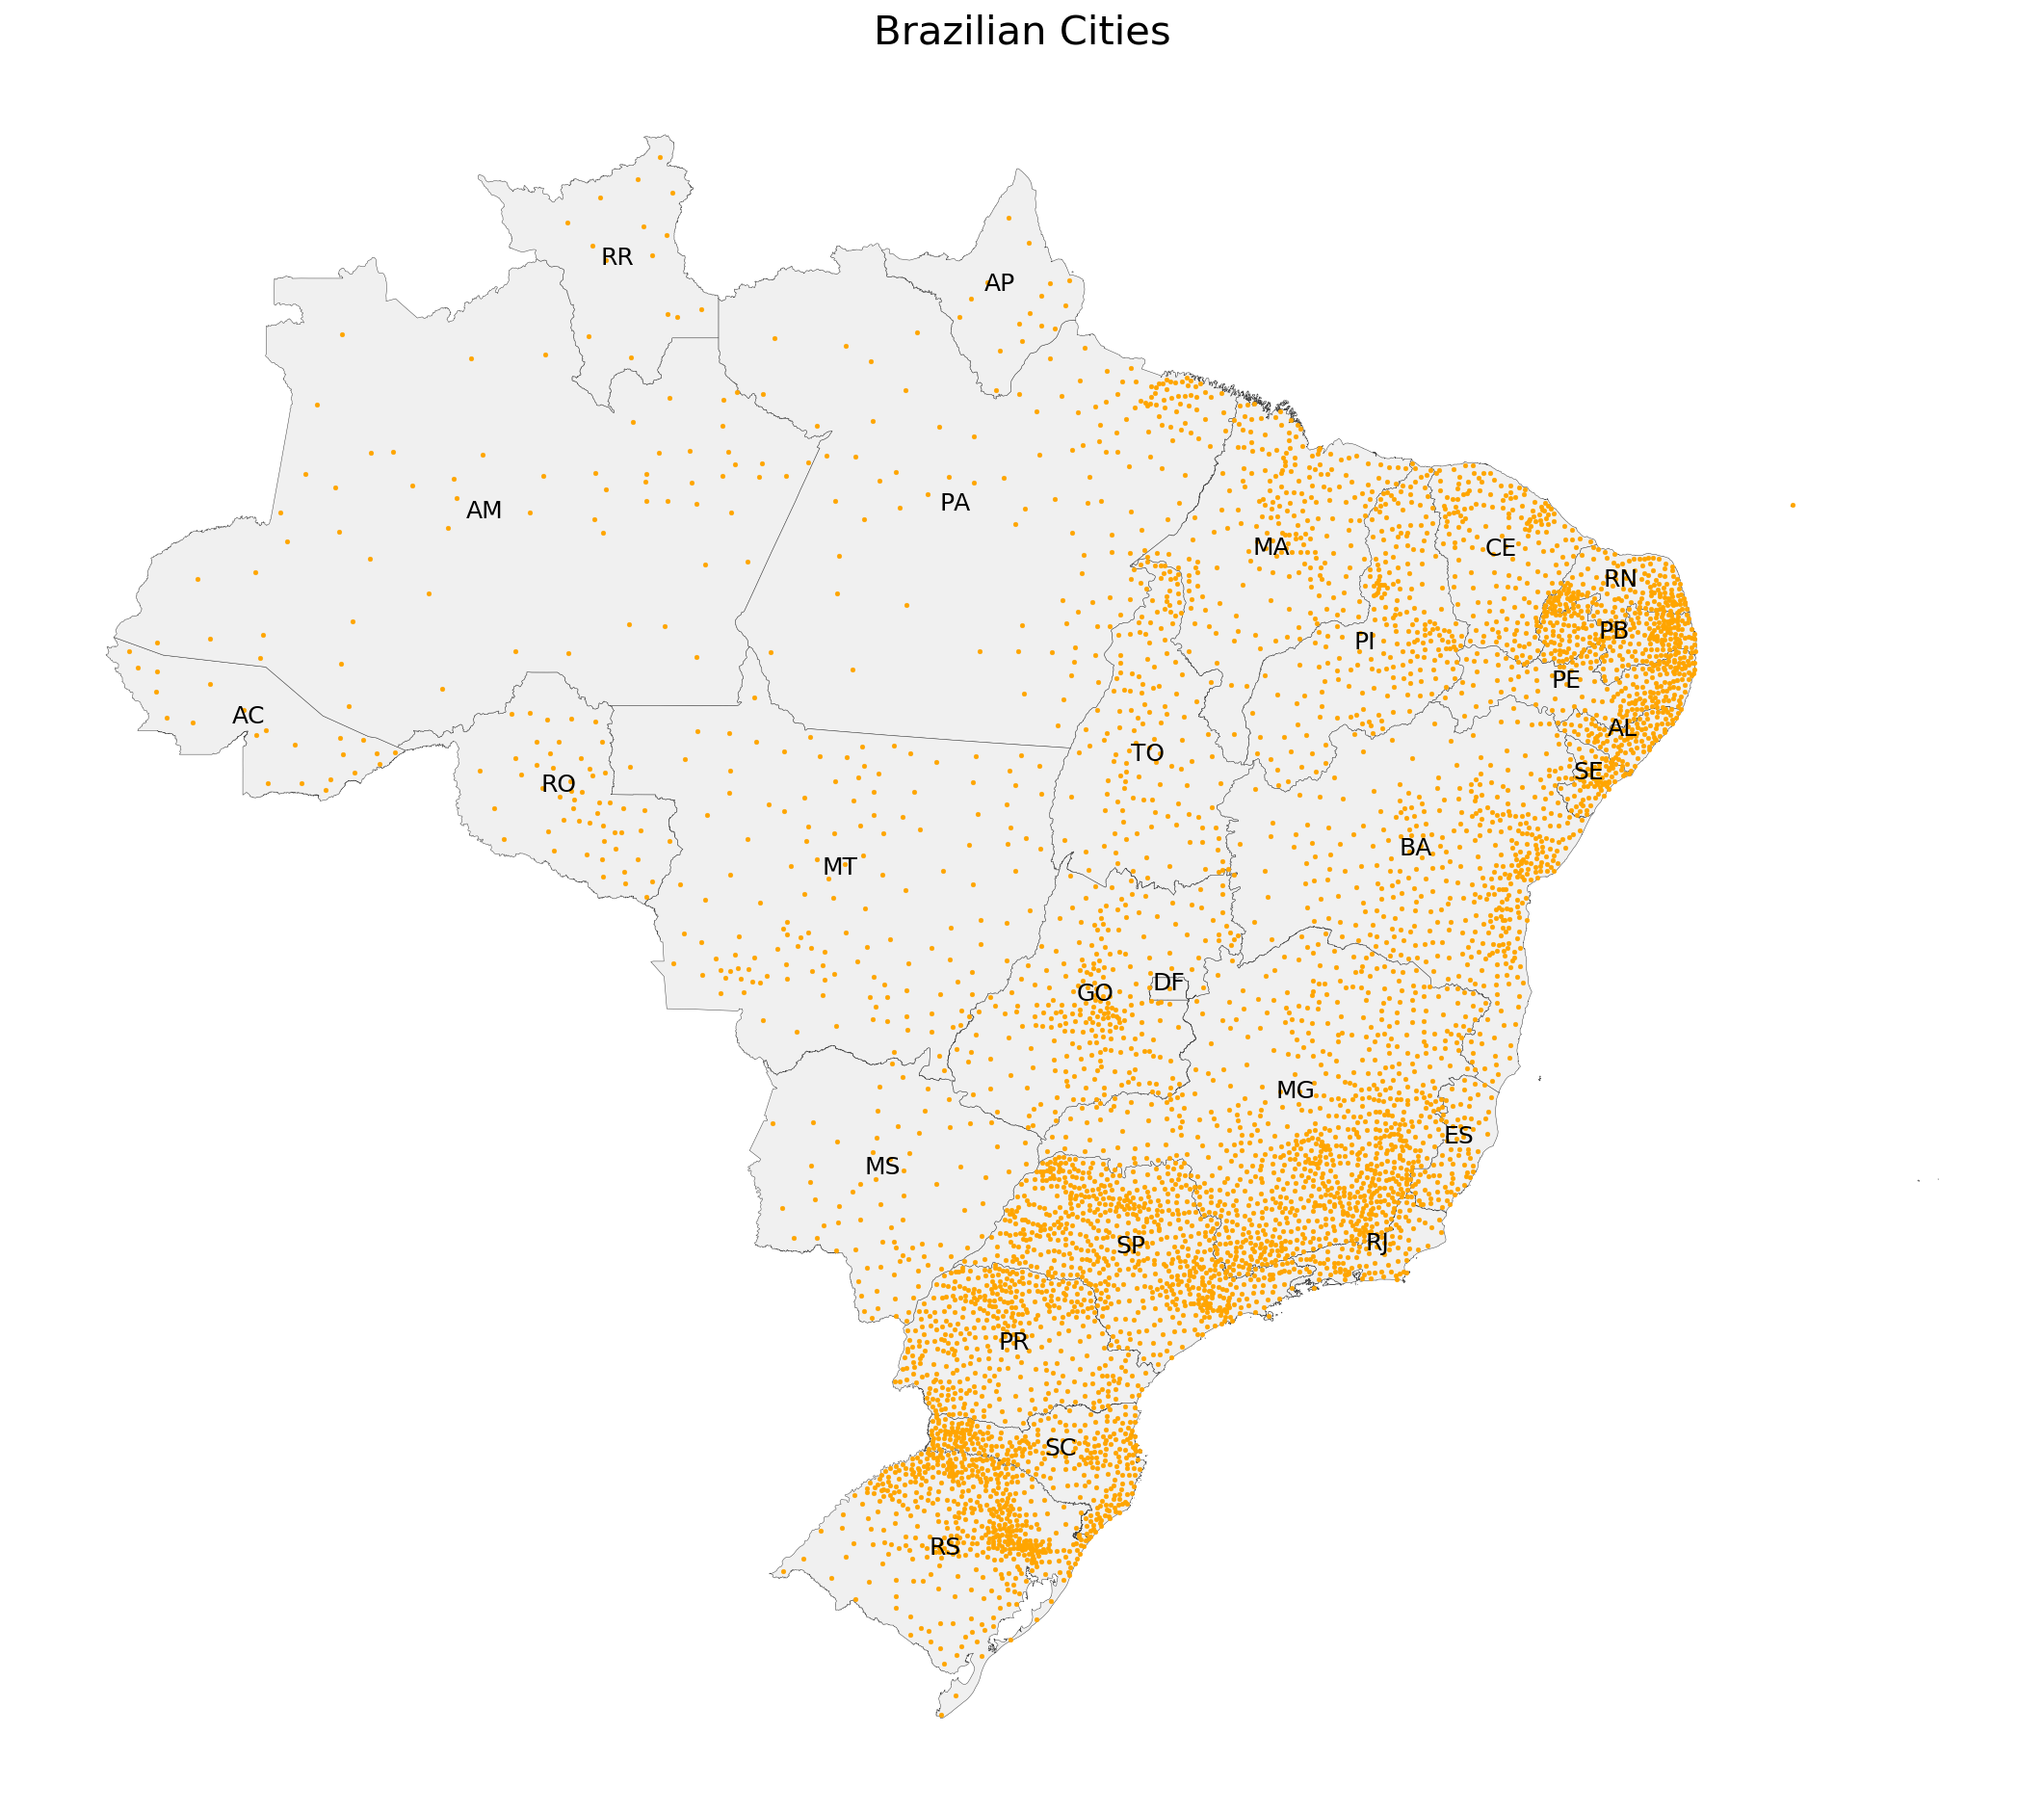

In [42]:
ax = br_shp.plot(figsize=(18, 16), color='#F0F0F0', edgecolor='#444444')
br_cities_pnt.plot(ax=ax, color="orange", markersize=5, label='City')
plt.title("Brazilian Cities", fontsize = 20);

for idx, row in br_shp.iterrows():
    plt.annotate(s=row['UF'],
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center',
                 fontsize=12)

plt.axis('off');

### Getting POIs

OpenStreetMap data from:
http://download.geofabrik.de/south-america/brazil.html

In [43]:
!ls ../data_out/10_geodata/35_main_roads_by_state

ce_motorway.cpg ce_primary.shp  mg_primary.dbf  rj_motorway.shx sp_motorway.prj
ce_motorway.dbf ce_primary.shx  mg_primary.prj  rj_primary.cpg  sp_motorway.shp
ce_motorway.prj mg_motorway.cpg mg_primary.shp  rj_primary.dbf  sp_motorway.shx
ce_motorway.shp mg_motorway.dbf mg_primary.shx  rj_primary.prj  sp_primary.cpg
ce_motorway.shx mg_motorway.prj rj_motorway.cpg rj_primary.shp  sp_primary.dbf
ce_primary.cpg  mg_motorway.shp rj_motorway.dbf rj_primary.shx  sp_primary.prj
ce_primary.dbf  mg_motorway.shx rj_motorway.prj sp_motorway.cpg sp_primary.shp
ce_primary.prj  mg_primary.cpg  rj_motorway.shp sp_motorway.dbf sp_primary.shx


**SouthEast Roads**

In [47]:
sp_motorway = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/sp_motorway.shp', encoding = 'utf-8')
sp_primary = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/sp_primary.shp', encoding = 'utf-8')

In [48]:
rj_motorway = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/rj_motorway.shp', encoding = 'utf-8')
rj_primary = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/rj_primary.shp', encoding = 'utf-8')

In [49]:
mg_motorway = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/mg_motorway.shp', encoding = 'utf-8')
mg_primary = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/mg_primary.shp', encoding = 'utf-8')

In [50]:
ce_motorway = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/ce_motorway.shp', encoding = 'utf-8')
ce_primary = gpd.read_file('../data_out/10_geodata/35_main_roads_by_state/ce_primary.shp', encoding = 'utf-8')

## Maping CoronaVirus data

### Support Functions

In [66]:
def get_Brazil_data(dt):
    total_cases = dt.totalCases.sum()
    deaths = dt.deaths.sum()
    cfr = round((deaths / total_cases) * 100, 2)
    date = datetime.datetime.today()
    cv_city = pd.merge(br_cities, dt, on='COD. IBGE')
    cv_city['TotalCases/1M pop'] = round(
        cv_city.totalCases / (cv_city['POP_2019'] / 1000_000), 1)
    cv_city['Deaths/1M pop'] = round(
        cv_city.deaths / (cv_city['POP_2019'] / 1000_000), 1)
    deaths_city = cv_city.loc[cv_city['deaths'] != 0].copy()
    cv_city_pnt = cv_city.copy()
    cv_city_pnt['geometry'] = cv_city_pnt['geometry'].representative_point()
    deaths_city_pnt = cv_city_pnt[cv_city_pnt.deaths != 0]
    print(
        'Brazil: Total number of Covid19 cases at {}/{}: {:,} ({:,} fatal) in {:,} cities with a CFR of {}%'
        .format(date.month, date.day, total_cases, deaths, len(cv_city.index),
                cfr))

    dt_city = cv_city_pnt.sort_values('totalCases', ascending=False).copy()
    dt_city = dt_city[[
        'City', 'UF', 'POP_2019', 'AREA APROX', 'DENS. DEMO', 'totalCases',
        'deaths', 'CFR[%]', 'TotalCases/1M pop', 'Deaths/1M pop'
    ]].reset_index(drop=True)
    dt_city.index += 1
    file = '../data_out/20_Covid_Database_Brazil/cv19_Brazil_' + str(
        date.month) + '-' + str(date.day) + '-' + str(date.year) + '.xlsx'
    dt_city.to_excel(file)

    return cv_city, deaths_city, cv_city_pnt, deaths_city_pnt, total_cases, deaths, cfr

In [191]:
def plt_Brasil_cities(cv_city,
                      deaths_city,
                      date,
                      total_cases,
                      deaths,
                      cfr,
                      deaths_only=False):
    ax = br_shp.plot(figsize=(18, 16), color='#FFFFFF', edgecolor='#444444')
    if deaths_only == False:
        cv_city.plot(ax=ax, color="orange", markersize=5, label='City')
    deaths_city.plot(ax=ax,
                     color="red",
                     markersize=5,
                     label='City with Deaths')
    plt.title(
        'Brazil: Covid19 total cases at {}/{}/{}: {:,} ({:,} fatal in red) in {:,} identified cities with a CFR of {}%'
        .format(date.year, date.month, date.day, total_cases, deaths,
                len(cv_city.index), cfr),
        fontsize=20,
        loc='left')
    plt.axis('off')

    for idx, row in br_shp.iterrows():
        plt.annotate(s=row['UF'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center',
                     fontsize=10,
                     color='green')

    plt.annotate('Map created by Marcelo Rovai (MJRoBot.org) @{}/{}/{}'.format(
        date.year, date.month, date.day),
                 xy=(0.55, .17),
                 xycoords='figure fraction',
                 horizontalalignment='left',
                 fontsize=12,
                 color='blue')
    plt.annotate('Data provided by https://labs.wesleycota.com/sarscov2/br/',
                 xy=(0.55, .16),
                 xycoords='figure fraction',
                 horizontalalignment='left',
                 fontsize=12,
                 color='blue')
    plt.annotate(
        'License: CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/',
        xy=(0.55, .15),
        xycoords='figure fraction',
        horizontalalignment='left',
        fontsize=12,
        color='blue')

    file_today = '../images/!cv19_BR_last_updated.png'
    file = '../images/cv19_Brazil_' + str(date.month) + '-' + str(
        date.day) + '-' + str(date.year) + '.png'
    #file_gif = '../br_images_gif/today_cv19_Brazil.png'

    if deaths_only == False:
        plt.savefig(file, dpi=300)
        plt.savefig(file_today, dpi=300)
        #plt.savefig(file_gif, dpi=200)

In [71]:
def plt_Brasil_cv_metrics(cv_city_pnt,
                          deaths_city_pnt,
                          date,
                          total_cases,
                          deaths,
                          cfr,
                          metrics='totalCases',
                          n=4):
    ax = br_shp.plot(figsize=(18, 16), color='#FFFFFF', edgecolor='#444444')
    cv_city_pnt.plot(ax=ax,
                     color='orange',
                     markersize=n * cv_city_pnt[metrics],
                     alpha=.5)
    if metrics == 'totalCases':
        deaths_city_pnt.plot(ax=ax,
                             color='black',
                             marker='+',
                             alpha=.5,
                             markersize=100,
                             label='Deaths')
        ax.legend(fontsize=15)
        plt.title(
            'Brazil: Covid19 total cases at {}/{}/{}: {:,} ({:,} fatal) in {:,} identified cities with a CFR of {}%'
            .format(date.year, date.month, date.day, total_cases, deaths,
                    len(cv_city.index), cfr),
            fontsize=20,
            loc='left')
    elif metrics == 'CFR[%]':
        plt.title(
            'Covid19 Case Fatality Rate (CFR[%]) per city in Brazil at {}/{}/{}'
            .format(date.year, date.month, date.day),
            fontsize=20,
            loc='left')
    elif metrics == 'TotalCases/1M pop':
        plt.title(
            'Covid19 Total Cases per each 1 Million inhabitants per city in Brazil at {}/{}/{}'
            .format(date.year, date.month, date.day),
            fontsize=20,
            loc='left')
    elif metrics == 'Deaths/1M pop':
        plt.title(
            'Covid19 Deaths per each 1 Million inhabitants per city in Brazil at {}/{}/{}'
            .format(date.year, date.month, date.day),
            fontsize=20,
            loc='left')

    plt.axis('off')

    for idx, row in br_shp.iterrows():
        plt.annotate(s=row['UF'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center',
                     fontsize=10,
                     color='green')

    plt.annotate('Map created by Marcelo Rovai (MJRoBot.org) @{}/{}/{}'.format(
        date.year, date.month, date.day),
                 xy=(0.55, .15),
                 xycoords='figure fraction',
                 horizontalalignment='left',
                 fontsize=12,
                 color='blue')
    plt.annotate('Data provided by https://labs.wesleycota.com/sarscov2/br/',
                 xy=(0.55, .14),
                 xycoords='figure fraction',
                 horizontalalignment='left',
                 fontsize=12,
                 color='blue')
    plt.annotate(
        'License: CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/',
        xy=(0.55, .13),
        xycoords='figure fraction',
        horizontalalignment='left',
        fontsize=12,
        color='blue')

    metrics = metrics.replace('/', '_per_')
    metrics = metrics.replace(' ', '_')

    file_today = '../images/!cv19_BR_CV_' + metrics + '_last_updated.png'
    file = '../images/cv19_Brazil_CV_' + metrics + '_' + str(
        date.month) + '-' + str(date.day) + '-' + str(date.year) + '.png'
    plt.savefig(file, dpi=300)
    plt.savefig(file_today, dpi=300)

In [79]:
def get_state_info(cv_city, dt_state, state):
    date = datetime.datetime.today()
    
    cv_state = cv_city.loc[cv_city['UF'] == state].copy()
    deaths_state = cv_state.loc[cv_state['deaths'] != 0].copy()
    state_total_cases = dt_state[dt_state.state == state].totalCases.sum()
    state_deaths = dt_state[dt_state.state == state].deaths.sum()
    print(
        'Total number of Covid19 cases reported in {} State at {}/{}: {:,} ({:,} fatal) in {:,} specified cities'
        .format(state, date.month, date.day, state_total_cases, state_deaths,
                len(cv_state.index)))
    plot_state_cases(state, cv_state, deaths_state, state_total_cases, state_deaths, date)
    dt_state = cv_state.sort_values('totalCases', ascending=False).copy()
    dt_state = dt_state[[
        'City', 'UF', 'POP_2019', 'AREA APROX',
        'DENS. DEMO', 'totalCases', 'deaths'
    ]].reset_index(drop=True)
    dt_state.index += 1
    file = '../data_out/cv19_'+state+'_'+str(date.month)+'-'+str(date.day)+'-'+str(date.year)+'.xlsx'
    dt_state.to_excel(file)
    return cv_state, deaths_state, state_total_cases, state_deaths

In [192]:
def plot_state_cases(state, cv_state, deaths_state, state_total_cases,
                     state_deaths, date):
    if state == 'SP':
        sp_shp = br_shp.loc[br_shp['UF'] == state].copy()
        ax = sp_shp.plot(figsize=(18, 16),
                         color='#FFFFFF',
                         edgecolor='#444444')
        sp_motorway.plot(ax=ax, color="green", markersize=1, label='Motorway')
        sp_primary.plot(ax=ax,
                        color="#E8E8E8",
                        markersize=1,
                        label='Primary Roads')
        xy_1 = (-47.2, -25)
        xy_2 = (-47.2, -25.1)
        xy_3 = (-47.2, -25.2)
    if state == 'RJ':
        rj_shp = br_shp.loc[br_shp['UF'] == state].copy()
        ax = rj_shp.plot(figsize=(18, 16),
                         color='#FFFFFF',
                         edgecolor='#444444')
        rj_motorway.plot(ax=ax, color="green", markersize=1, label='Motorway')
        rj_primary.plot(ax=ax,
                        color="#E8E8E8",
                        markersize=1,
                        label='Primary Roads')
        xy_1 = (-42.3, -23.1)
        xy_2 = (-42.3, -23.15)
        xy_3 = (-42.3, -23.2)
    if state == 'MG':
        mg_shp = br_shp.loc[br_shp['UF'] == state].copy()
        ax = mg_shp.plot(figsize=(18, 16),
                         color='#FFFFFF',
                         edgecolor='#444444')
        mg_motorway.plot(ax=ax, color="green", markersize=1, label='Motorway')
        mg_primary.plot(ax=ax,
                        color="#E8E8E8",
                        markersize=1,
                        label='Primary Roads')
        xy_1 = (-44.7, -22.8)
        xy_2 = (-44.7, -22.95)
        xy_3 = (-44.7, -23.1)

    if state == 'CE':
        ce_shp = br_shp.loc[br_shp['UF'] == state].copy()
        ax = ce_shp.plot(figsize=(18, 16),
                         color='#FFFFFF',
                         edgecolor='#444444')
        ce_motorway.plot(ax=ax, color="green", markersize=1, label='Motorway')
        ce_primary.plot(ax=ax,
                        color="#E8E8E8",
                        markersize=1,
                        label='Primary Roads')
        xy_1 = (-39, -7.95)
        xy_2 = (-39, -8.01)
        xy_3 = (-39, -8.07)

    
        
    cv_state.plot(ax=ax, color="orange", markersize=5, label='City')
    deaths_state.plot(ax=ax,
                      color="red",
                      markersize=5,
                      label='City with Deaths')

    plt.title(
        'Covid19 total cases reported in {} State at {}/{}/{}: {:,} ({:,} fatal in red) in {:,} identified cities'
        .format(state, date.year, date.month, date.day, state_total_cases, state_deaths,
                len(cv_state.index)),
        fontsize=20, loc='left')
    plt.axis('off')
    ax.legend(fontsize=15)
    
    plt.annotate(
        'Map created by Marcelo Rovai (MJRoBot.org) @{}/{}/{}'.format(
            date.year, date.month, date.day),
        xy=xy_1,
        fontsize=10,
        color='blue')
    plt.annotate('Data provided by https://labs.wesleycota.com/sarscov2/br/',
                 xy=xy_2,
                 fontsize=10,
                 color='blue')
    plt.annotate(
        'License: CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/)',
        xy=xy_3,
        fontsize=10,
        color='blue')
    
    file_today = '../images/!cv19_'+ state +'_last_updated.png'
    plt.savefig(file_today, dpi=300)
    file = '../images/cv19_' + state + '_' + str(date.month) + '-' + str(
        date.day) + '-' + str(date.year) + '.png'
    plt.savefig(file, dpi=300)
    
    #file_gif = '../'+state.lower()+'_images_gif/today_cv19_' + state.lower() + '.png'
    #plt.savefig(file_gif, dpi=200)

In [210]:
def save_gifs (state):
    frames = []
    imgs = sorted(glob.glob('../'+state.lower()+'_images_gif/*.png'))
    for i in imgs:
        frames.append(imageio.imread(i))
    imageio.mimsave('../gifs/'+state+'_Covid-19_Timeline.gif', frames)

In [193]:
def create_state_gif(dates, cv_city_t, deaths_city_t, state):

    for date in dates:

        if state == 'BR':
            ax = br_shp.plot(figsize=(18, 16),
                               color='#FFFFFF',
                               edgecolor='#444444')
            fdtt = cv_city_t.loc[cv_city_t['date'] == date].copy()
            fdtt_deaths = deaths_city_t.loc[deaths_city_t['date'] == date].copy()
            fdtt.plot(ax=ax, color="orange", markersize=5, label='City')              
            fdtt_deaths.plot(ax=ax, color="red", markersize=5, label='death')
            plt.title('Brazilian cities reported with Covid19 cases (orange) and deaths (red))', fontsize=30)
            for idx, row in br_shp.iterrows():
                plt.annotate(s=row['UF'],
                             xy=(row.geometry.centroid.x,
                                 row.geometry.centroid.y),
                             horizontalalignment='center',
                             fontsize=10,
                             color='green')

            xy_a = (0.7, .85)
            xy_b = (0.7, .82)
            xy_c = (0.7, .79)
            xy_d = (0.7, .76)
            xy_1 = (-48.8, -32.7)
            xy_2 = (-48.8, -33.2)
            xy_3 = (-48.8, -33.7)

        if state == 'SP':
            sp_shp = br_shp.loc[br_shp['UF'] == state].copy()
            ax = sp_shp.plot(figsize=(18, 16),
                             color='#FFFFFF',
                             edgecolor='#444444')
            sp_motorway.plot(ax=ax,
                             color="green",
                             markersize=1,
                             label='Motorway')
            sp_primary.plot(ax=ax,
                            color="#E8E8E8",
                            markersize=1,
                            label='Primary Roads')

            xy_a = (0.7, .72)
            xy_b = (0.7, .69)
            xy_c = (0.7, .66)
            xy_d = (0.7, .63)
            xy_1 = (-47.2, -25)
            xy_2 = (-47.2, -25.1)
            xy_3 = (-47.2, -25.2)

        if state == 'RJ':
            rj_shp = br_shp.loc[br_shp['UF'] == state].copy()
            ax = rj_shp.plot(figsize=(18, 16),
                             color='#FFFFFF',
                             edgecolor='#444444')
            rj_motorway.plot(ax=ax,
                             color="green",
                             markersize=1,
                             label='Motorway')
            rj_primary.plot(ax=ax,
                            color="#E8E8E8",
                            markersize=1,
                            label='Primary Roads')

            xy_a = (0.2, .72)
            xy_b = (0.2, .69)
            xy_c = (0.2, .66)
            xy_d = (0.2, .63)
            xy_1 = (-42.3, -23.1)
            xy_2 = (-42.3, -23.15)
            xy_3 = (-42.3, -23.2)
            
        if state == 'MG':
            mg_shp = br_shp.loc[br_shp['UF'] == state].copy()
            ax = mg_shp.plot(figsize=(18, 16),
                             color='#FFFFFF',
                             edgecolor='#444444')
            mg_motorway.plot(ax=ax,
                             color="green",
                             markersize=1,
                             label='Motorway')
            mg_primary.plot(ax=ax,
                            color="#E8E8E8",
                            markersize=1,
                            label='Primary Roads')
            xy_a = (0.1, .72)
            xy_b = (0.1, .69)
            xy_c = (0.1, .66)
            xy_d = (0.1, .63)
            xy_1 = (-44.7, -22.8)
            xy_2 = (-44.7, -22.95)
            xy_3 = (-44.7, -23.1)

        if state == 'CE':
            ce_shp = br_shp.loc[br_shp['UF'] == state].copy()
            ax = ce_shp.plot(figsize=(18, 16),
                             color='#FFFFFF',
                             edgecolor='#444444')
            ce_motorway.plot(ax=ax,
                             color="green",
                             markersize=1,
                             label='Motorway')
            ce_primary.plot(ax=ax,
                            color="#E8E8E8",
                            markersize=1,
                            label='Primary Roads')
            xy_a = (0.7, .75)
            xy_b = (0.7, .72)
            xy_c = (0.7, .69)
            xy_d = (0.7, .66)
            xy_1 = (-39, -7.95)
            xy_2 = (-39, -8.01)
            xy_3 = (-39, -8.07)

        if state != 'BR':
            cv_state_t = cv_city_t.loc[cv_city_t['state'] == state].copy()
            deaths_state_t = deaths_city_t.loc[deaths_city_t['state'] == state].copy()
            fdtt = cv_state_t.loc[cv_state_t['date'] == date].copy()
            fdtt_deaths = deaths_state_t.loc[deaths_state_t['date'] == date].copy()
            fdtt.plot(ax=ax, color="orange", markersize=5, label='City')
            fdtt_deaths.plot(ax=ax, color="red", markersize=5, label='City')
            plt.title(state + ' state cities reported with Covid19 cases (orange) and deaths (red)',
                      fontsize=30)

        plt.annotate('Date:         {}'.format(date),
                     xy=xy_a,
                     xycoords='figure fraction',
                     horizontalalignment='left',
                     verticalalignment='top',
                     fontsize=25)

        plt.annotate('Total Cases:        {}'.format(str(
            fdtt.totalCases.sum())),
                     xy=xy_b,
                     xycoords='figure fraction',
                     horizontalalignment='left',
                     verticalalignment='top',
                     fontsize=25)
        plt.annotate('Total deaths:        {}'.format(str(
            fdtt_deaths.deaths.sum())),
                     xy=xy_c,
                     xycoords='figure fraction',
                     horizontalalignment='left',
                     verticalalignment='top',
                     fontsize=25)

        plt.annotate('Number of Cities:  {}'.format(str(len(fdtt.index))),
                     xy=xy_d,
                     xycoords='figure fraction',
                     horizontalalignment='left',
                     verticalalignment='top',
                     fontsize=25)
        plt.annotate('Map created by Marcelo Rovai (MJRoBot.org) ',
                     xy=xy_1,
                     fontsize=10,
                     color='blue')
        plt.annotate(
            'Data provided by https://labs.wesleycota.com/sarscov2/br/',
            xy=xy_2,
            fontsize=10,
            color='blue')
        plt.annotate(
            'License: CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/)',
            xy=xy_3,
            fontsize=10,
            color='blue')

        plt.axis('off')
        file = '../' + state.lower() + '_images_gif/cv19_' + state + '_' + str(
            date) + '.png'
        plt.savefig(file, dpi=200)

    save_gifs(state)

### Nationwide Analysis

In [168]:
date = datetime.datetime.today()
cv_city, deaths_city, cv_city_pnt, deaths_city_pnt, total_cases, deaths, cfr = get_Brazil_data(dt)

Brazil: Total number of Covid19 cases at 4/23: 49,776 (3,313 fatal) in 1,551 cities with a CFR of 6.66%


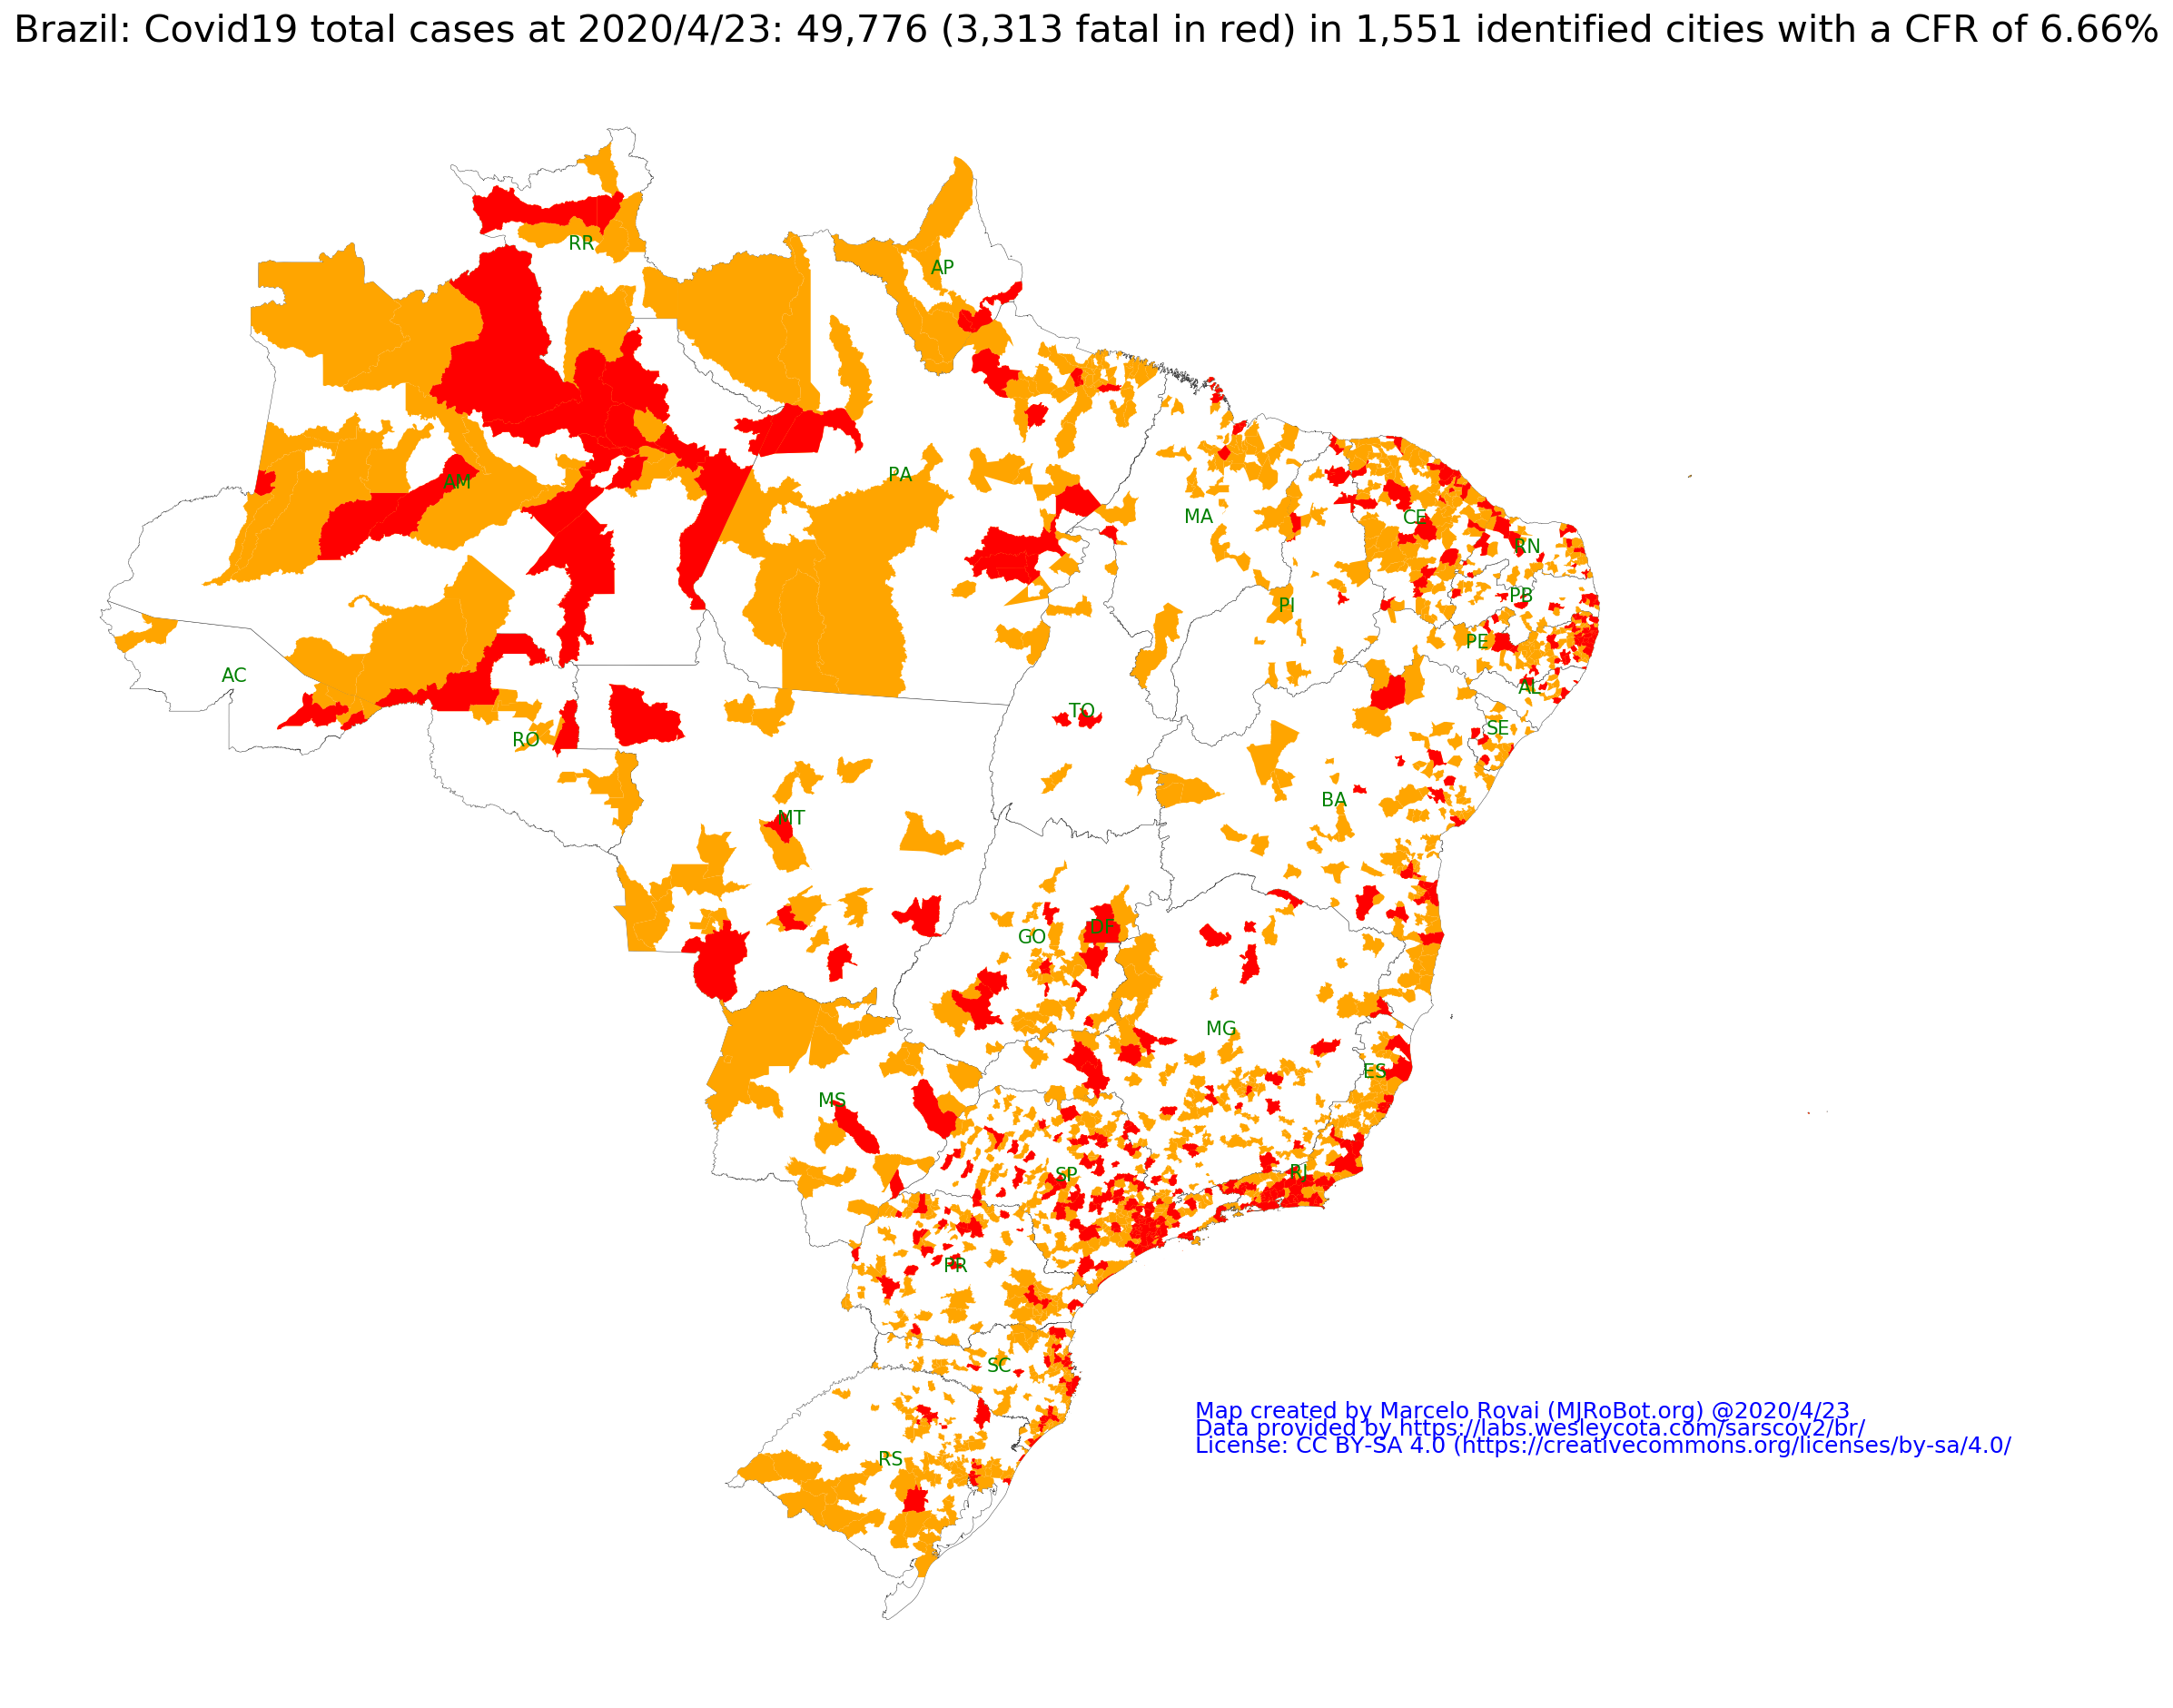

In [169]:
plt_Brasil_cities(cv_city, deaths_city, date, total_cases, deaths, cfr, deaths_only=False)

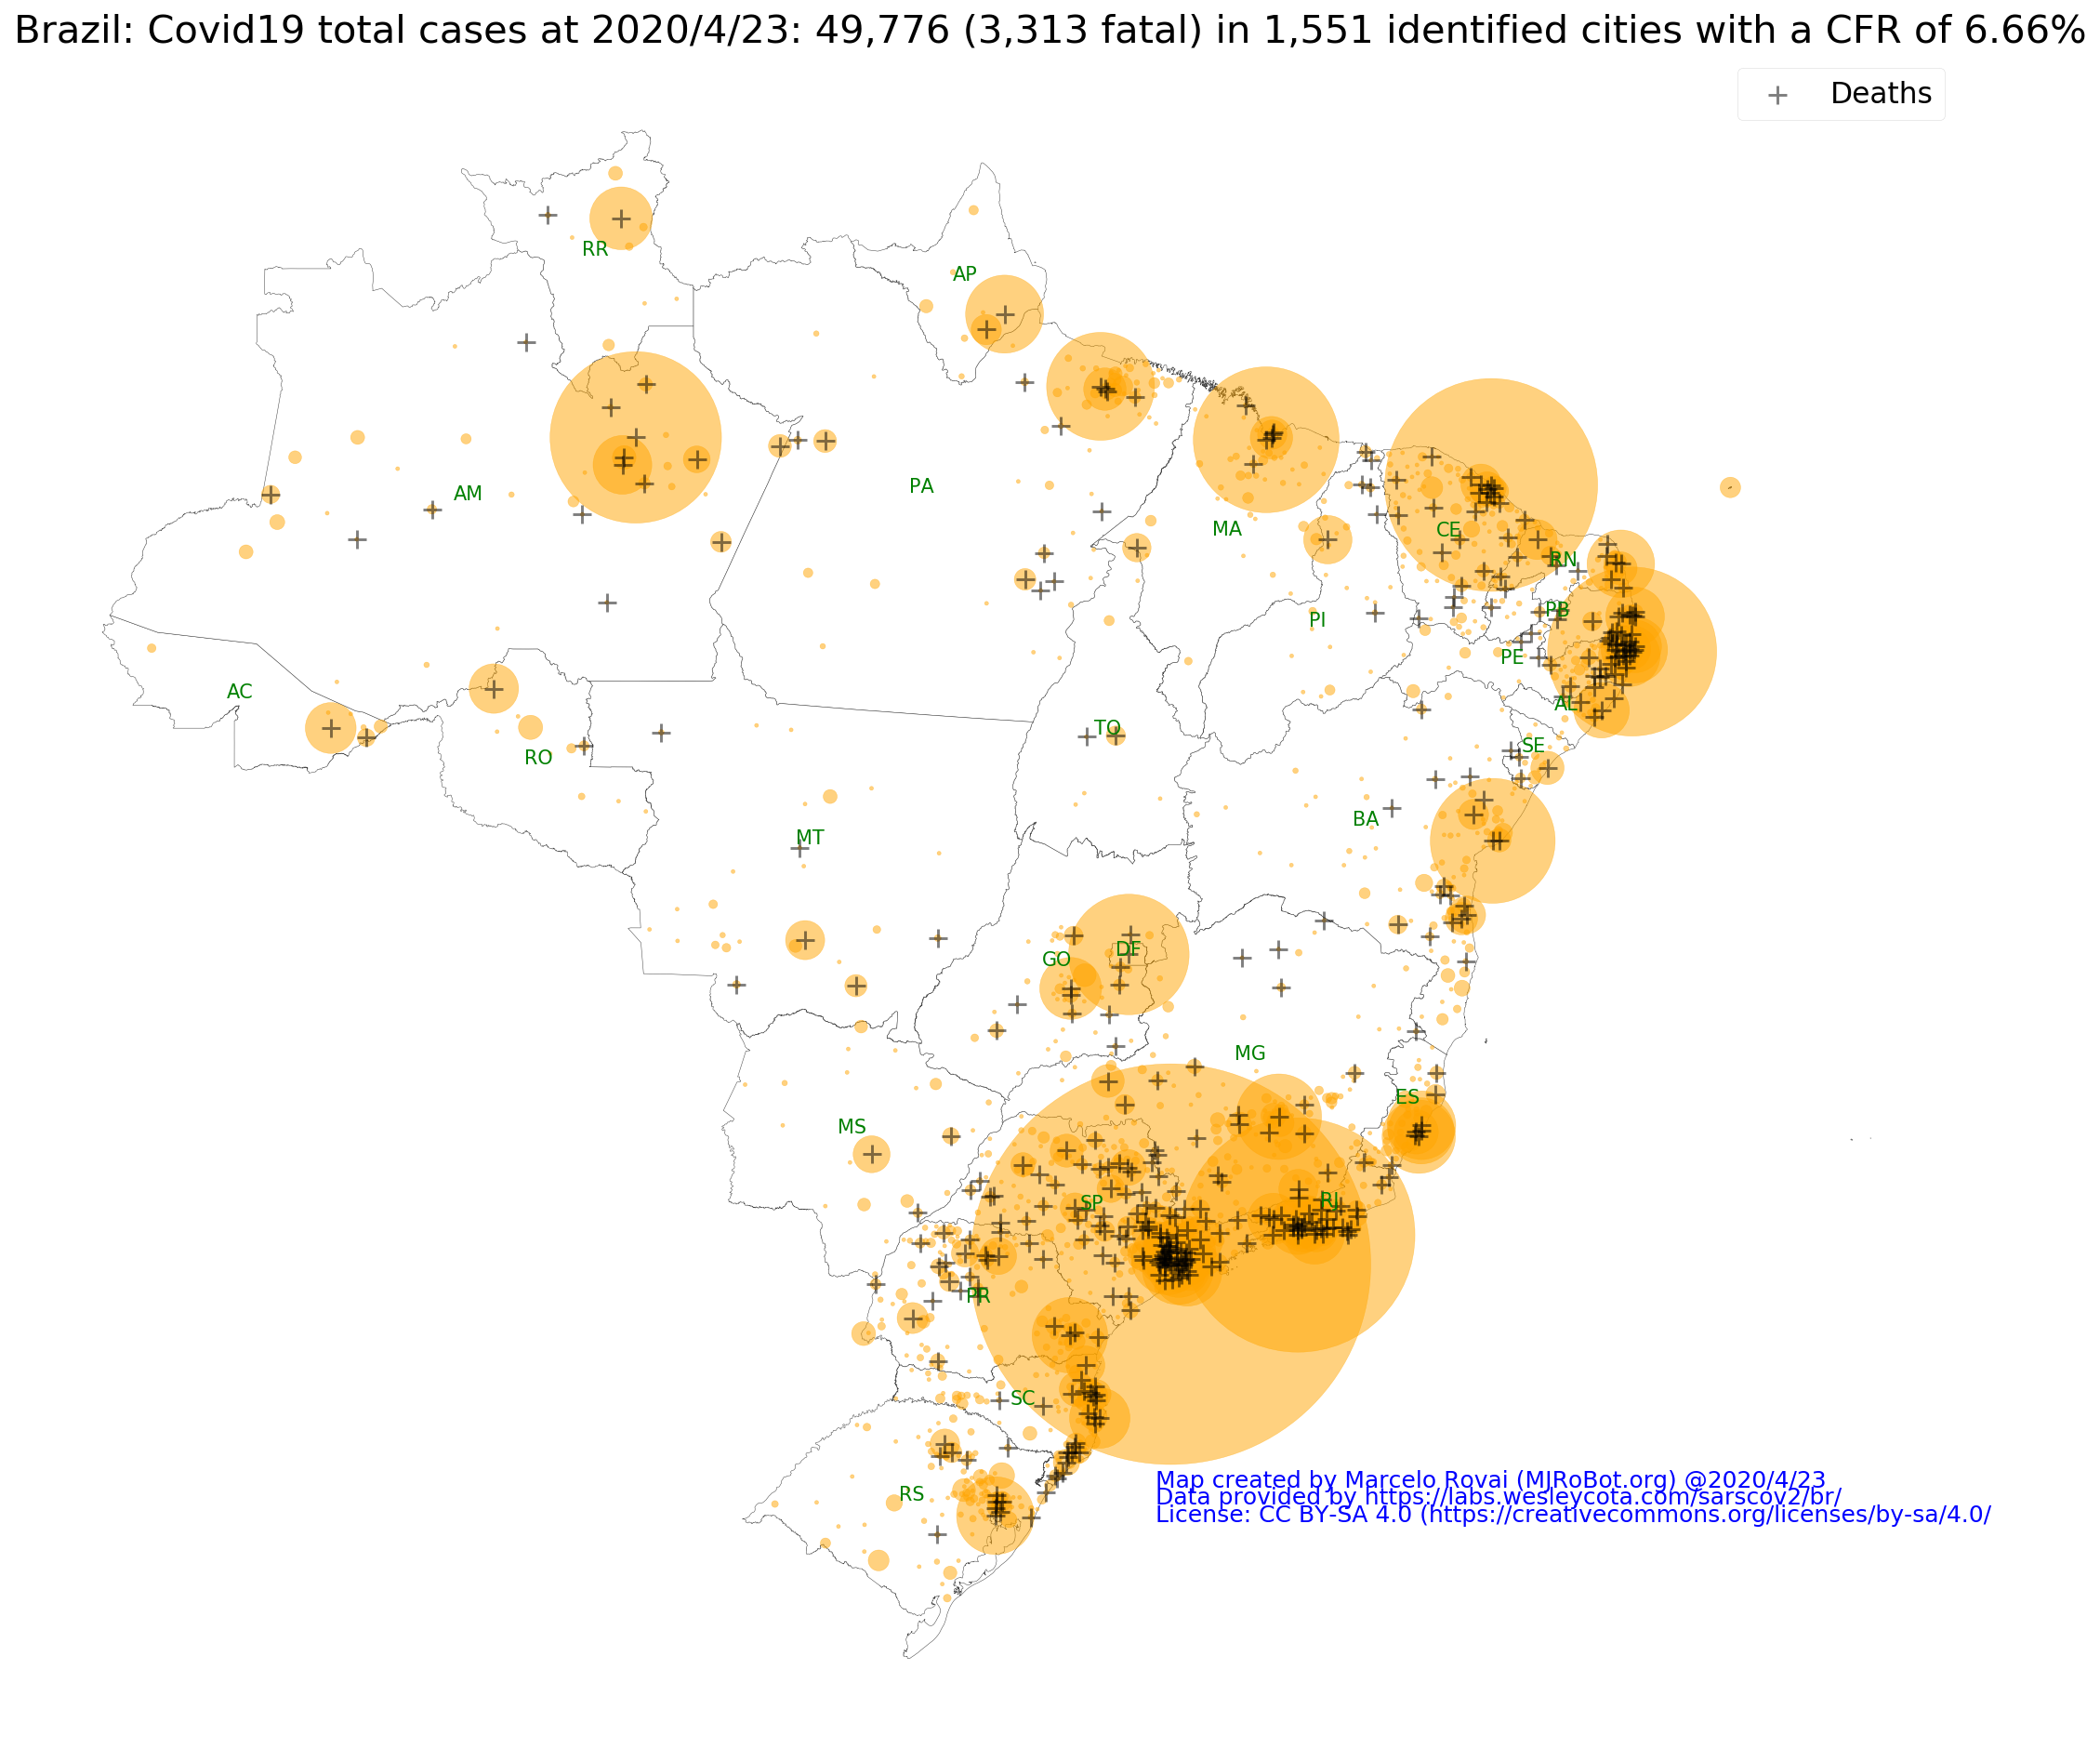

In [170]:
plt_Brasil_cv_metrics(cv_city_pnt, deaths_city_pnt, date, total_cases, deaths, cfr)

**WARNING** 

Position of annotation in final saved figures is different from the ones showed at Notebook

## Other Pandemic metrics maps

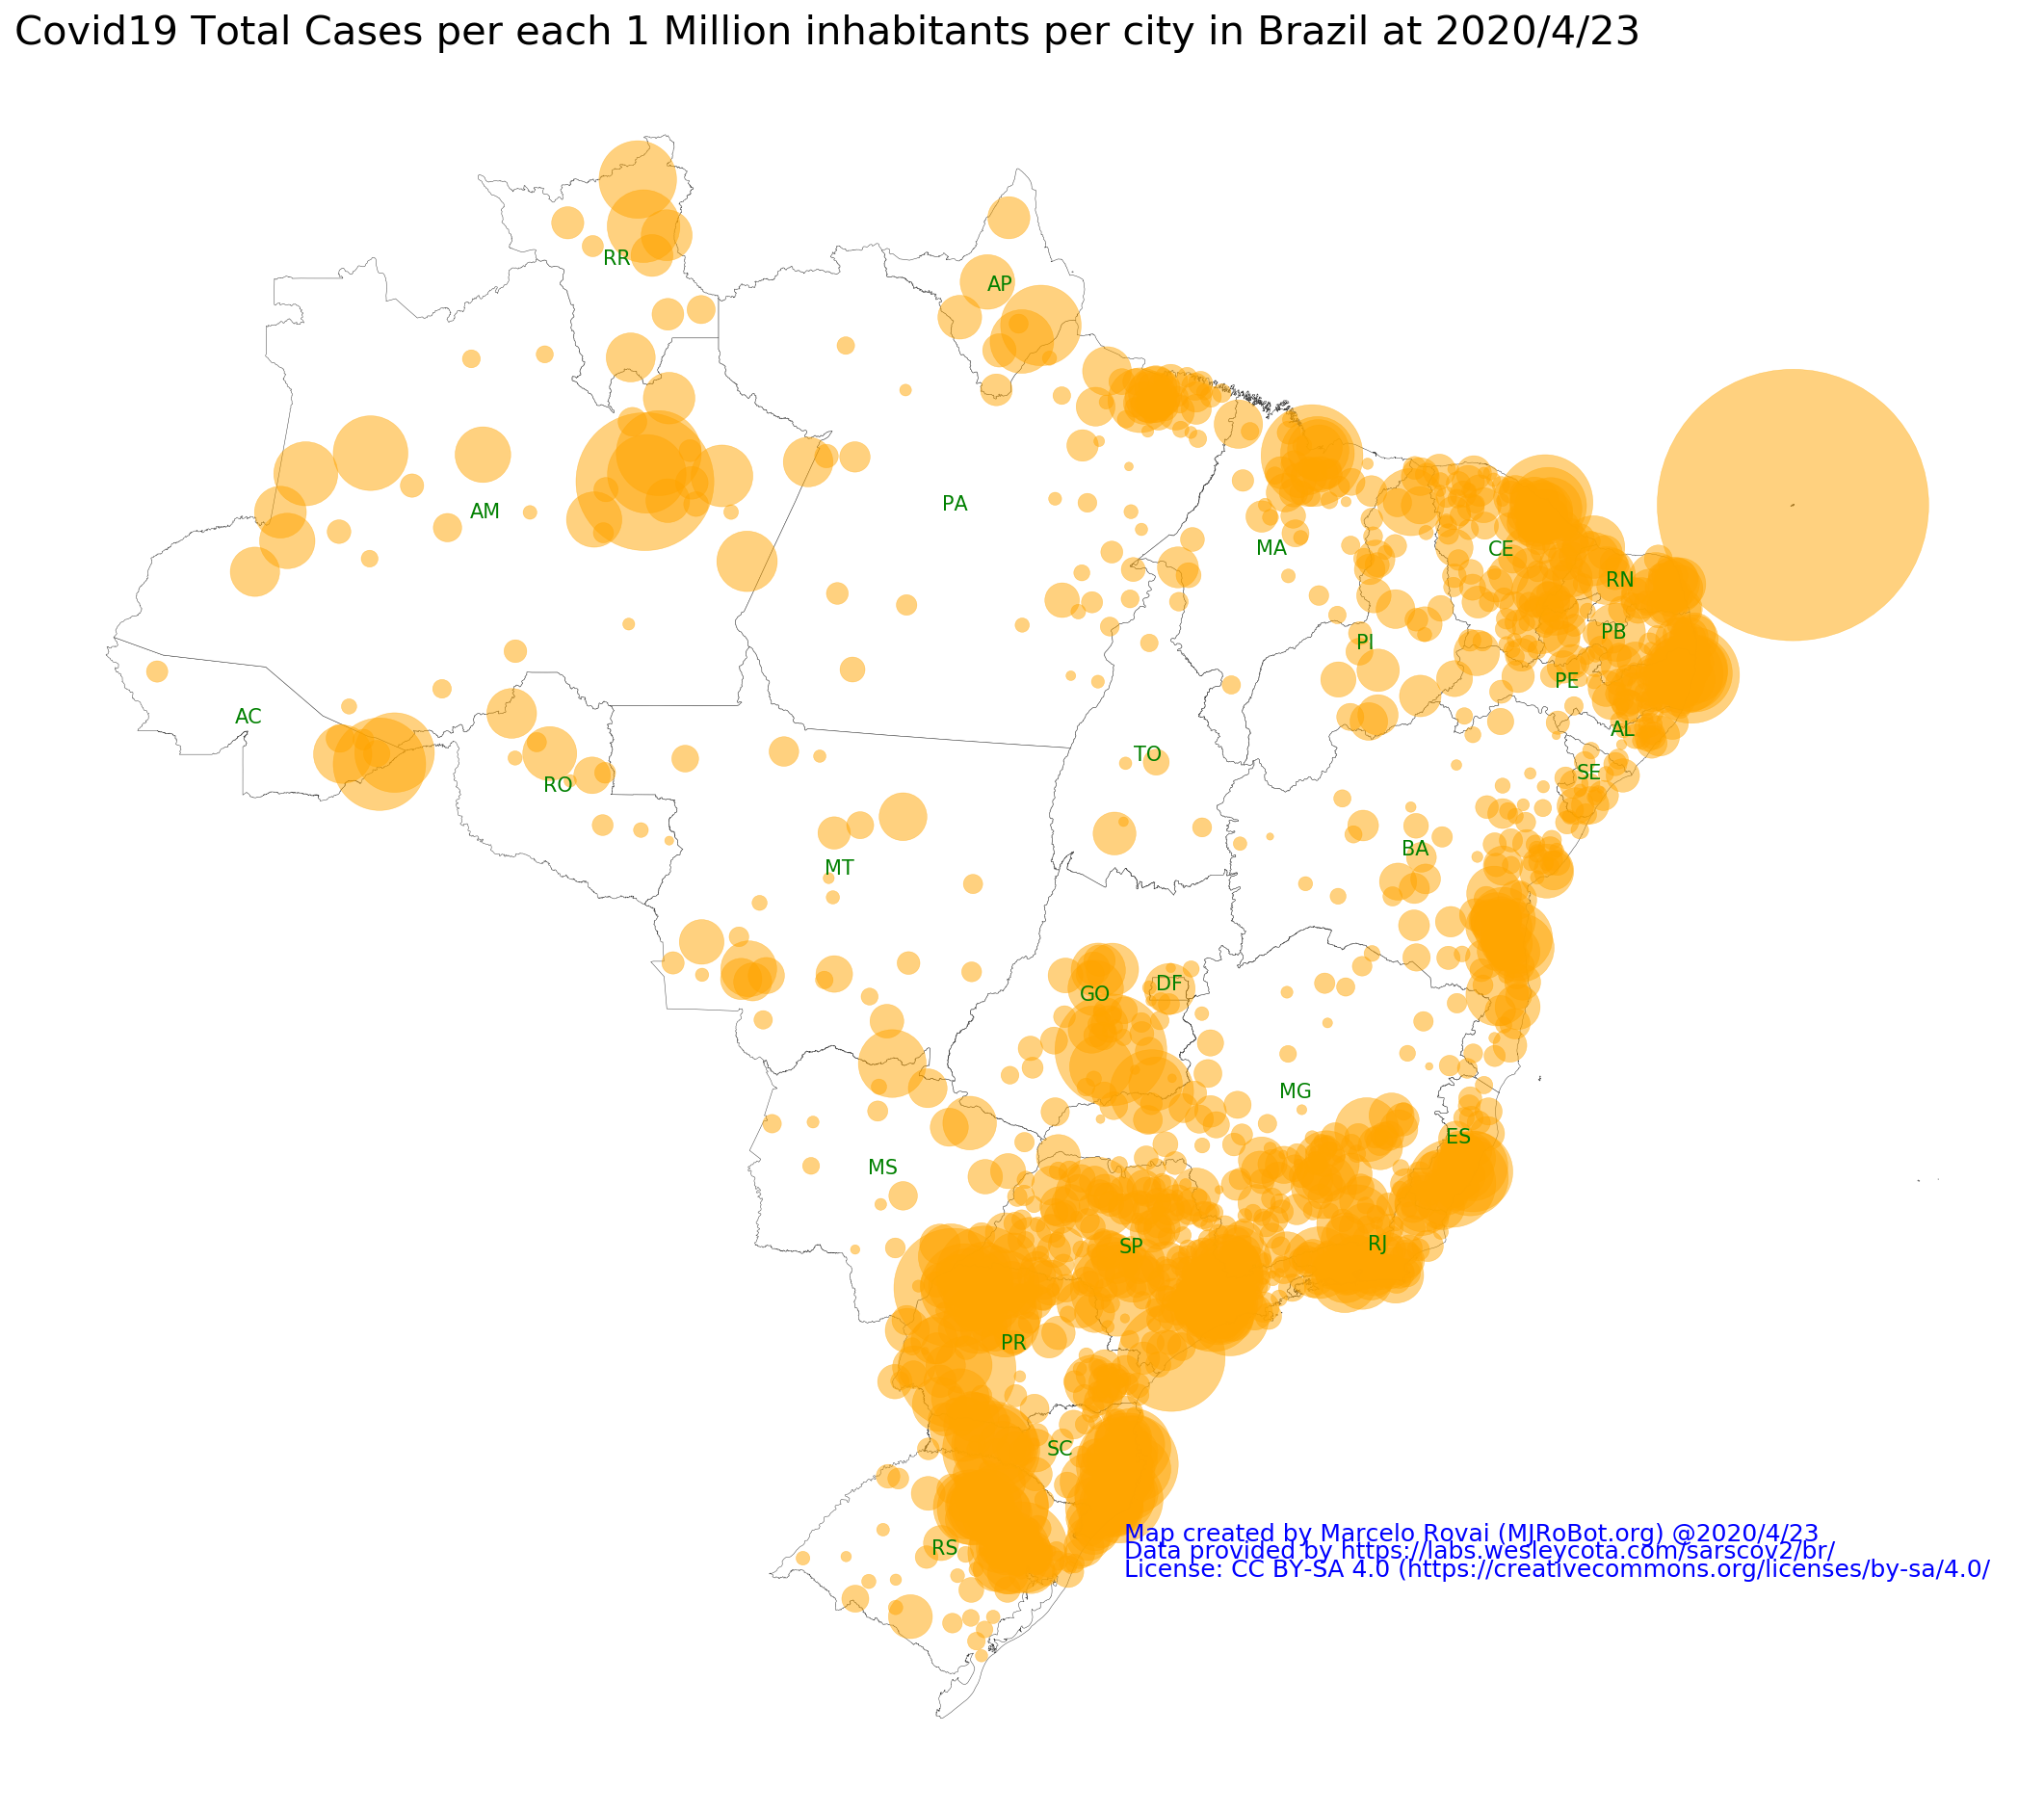

In [171]:
plt_Brasil_cv_metrics(cv_city_pnt, deaths_city_pnt, date, total_cases, deaths, cfr, metrics='TotalCases/1M pop', n=2 )

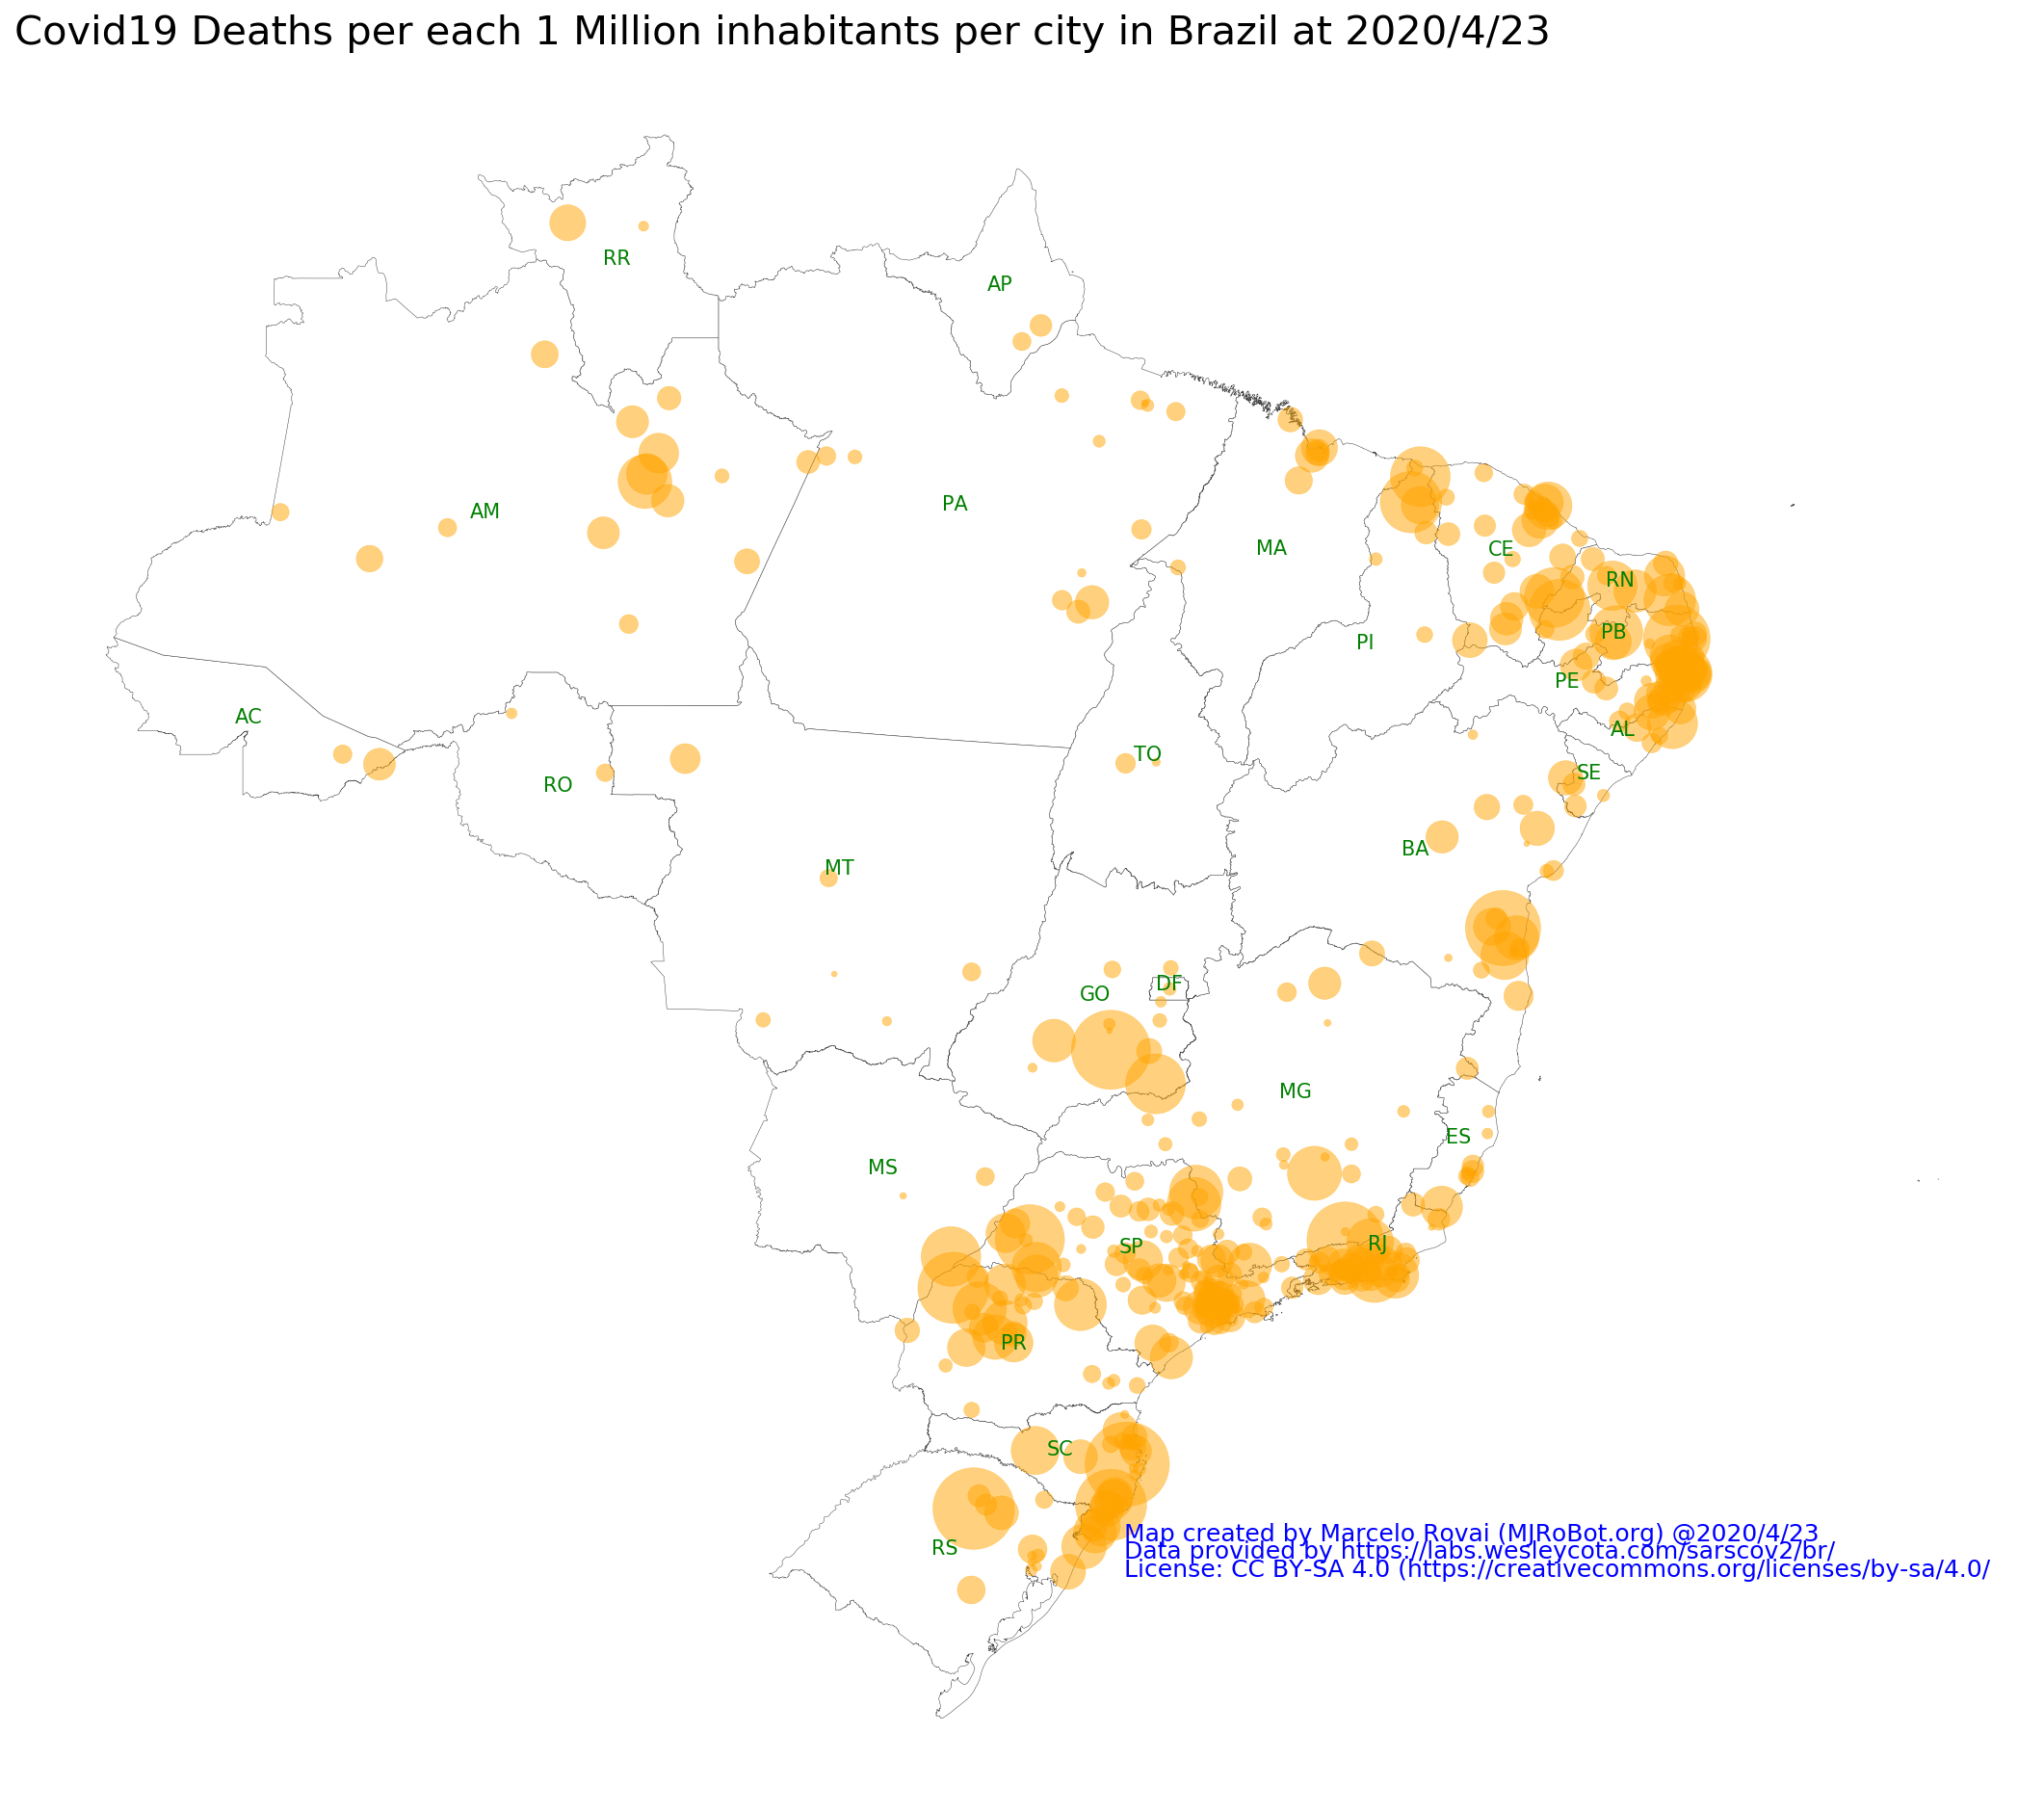

In [172]:
plt_Brasil_cv_metrics(cv_city_pnt, deaths_city_pnt, date, total_cases, deaths, cfr, metrics='Deaths/1M pop', n=5 )

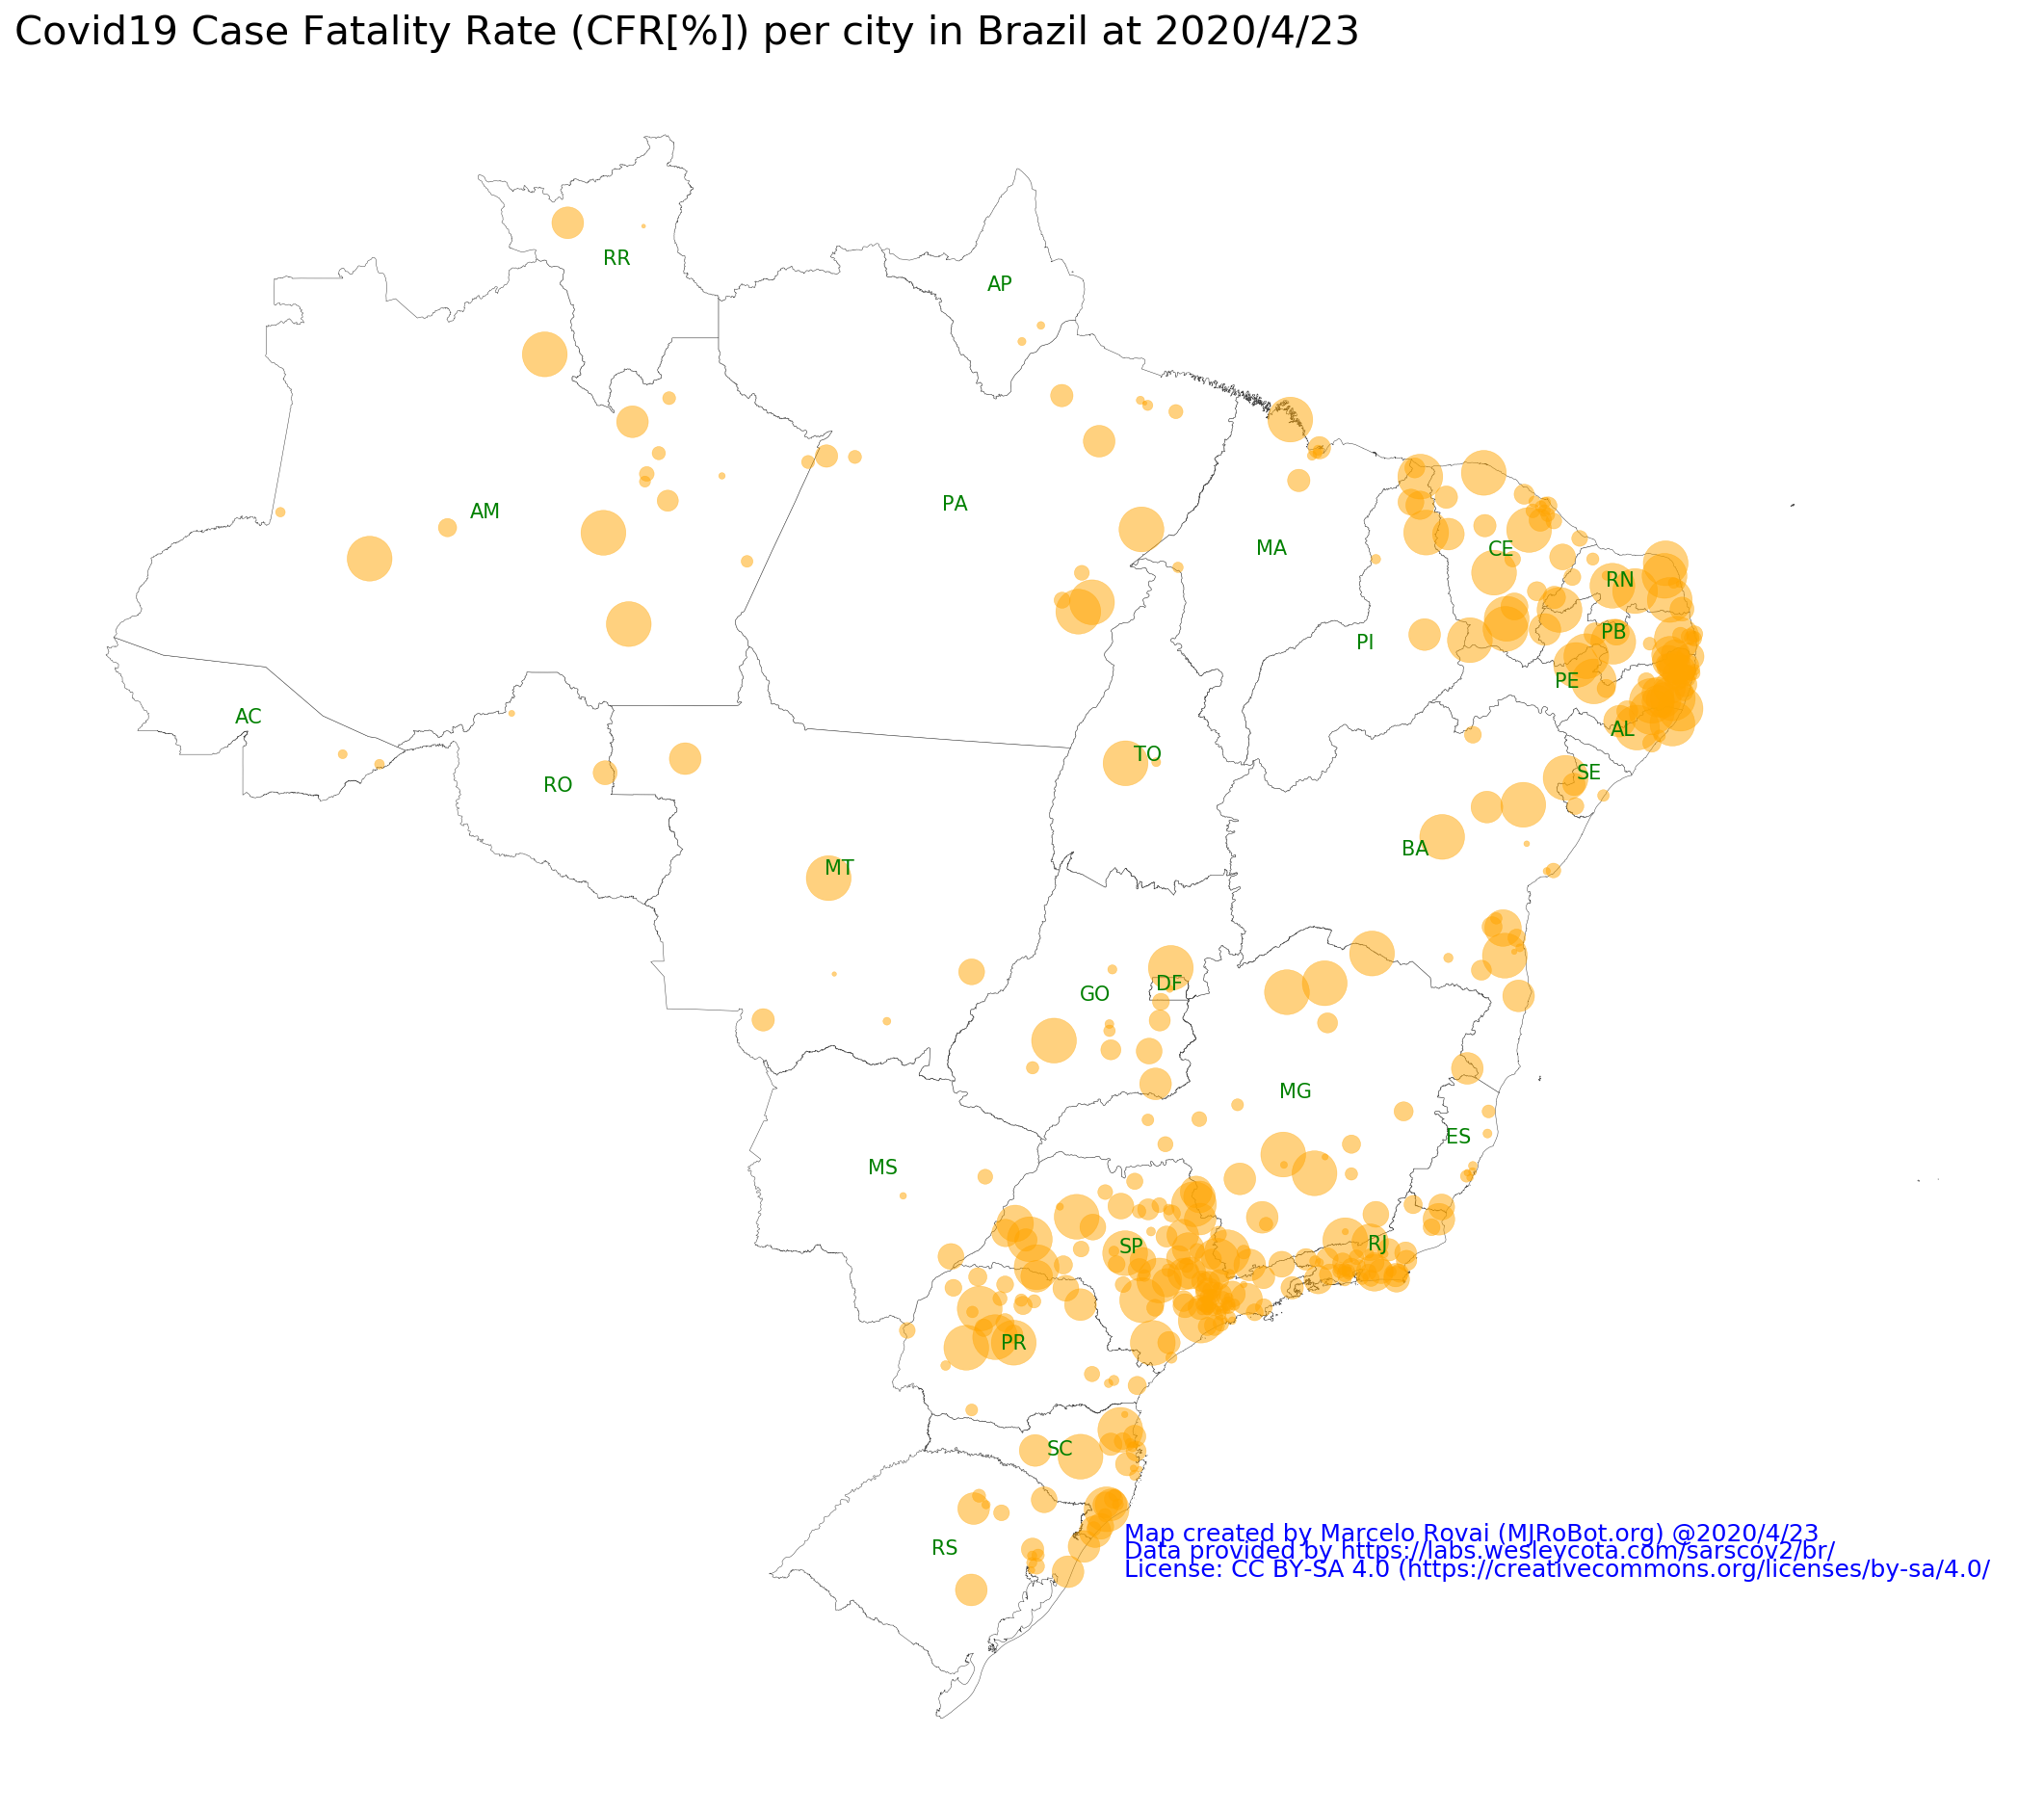

In [173]:
plt_Brasil_cv_metrics(cv_city_pnt, deaths_city_pnt, date, total_cases, deaths, cfr, metrics='CFR[%]', n=5 )

### Selected State Analysis

Total number of Covid19 cases reported in SP State at 4/23: 16,740 (1,345 fatal) in 243 specified cities


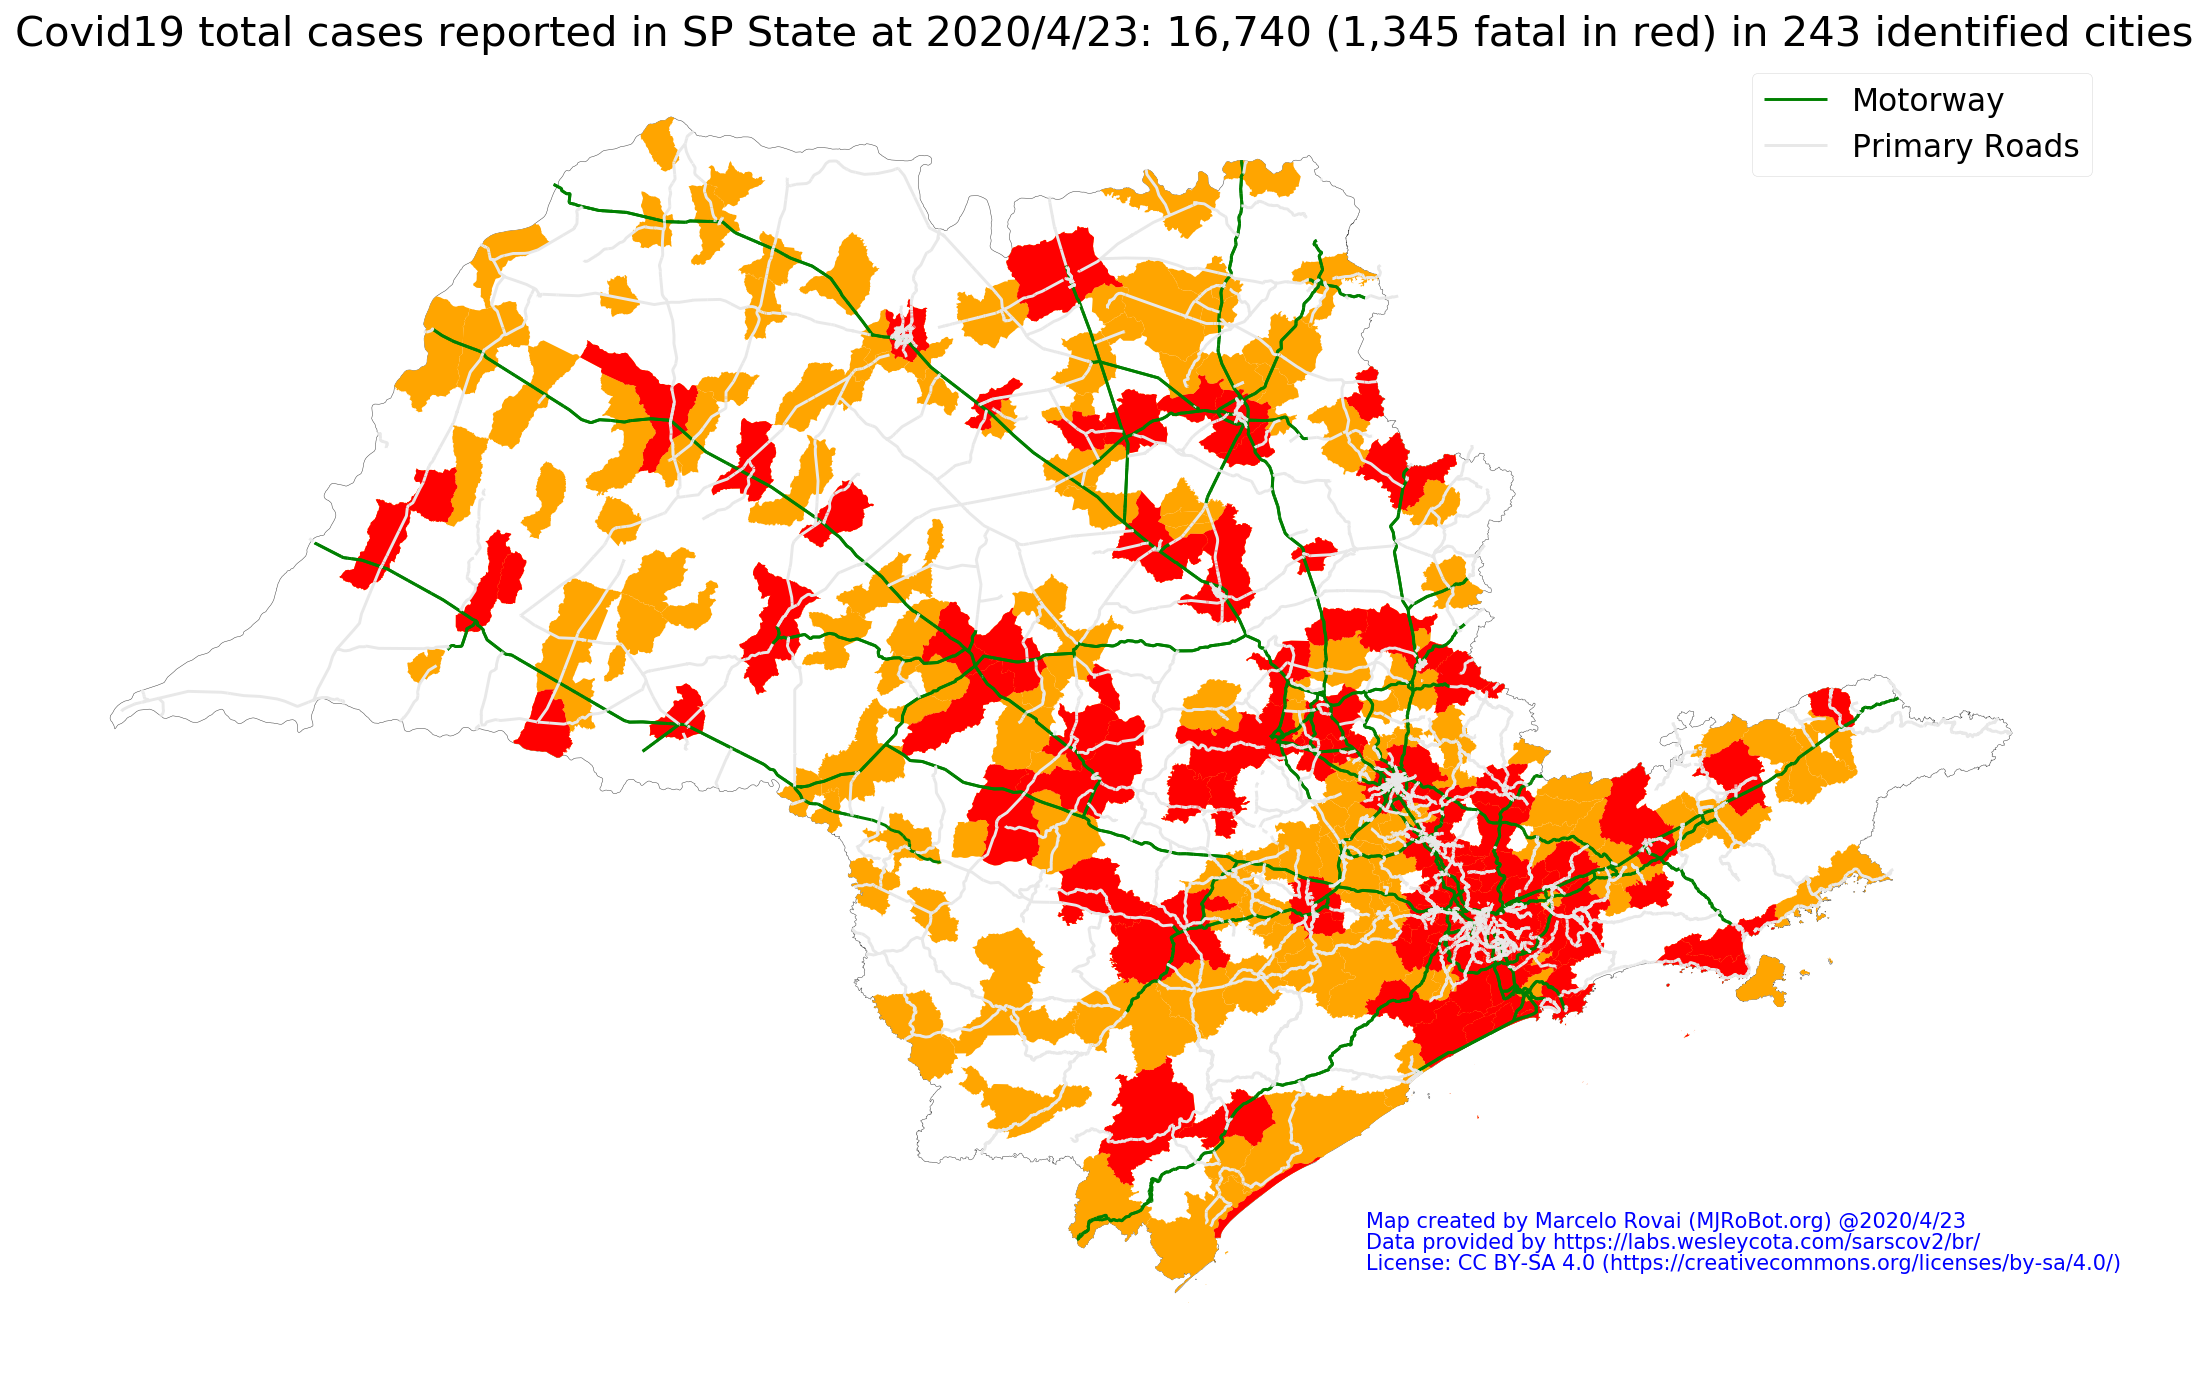

In [174]:
cv_sp, deaths_sp, sp_total_cases, sp_deaths = get_state_info(cv_city, dt_state, 'SP')

Total number of Covid19 cases reported in RJ State at 4/23: 6,172 (530 fatal) in 71 specified cities
Total number of Covid19 cases reported in MG State at 4/23: 1,308 (51 fatal) in 143 specified cities
Total number of Covid19 cases reported in CE State at 4/23: 4,702 (266 fatal) in 107 specified cities


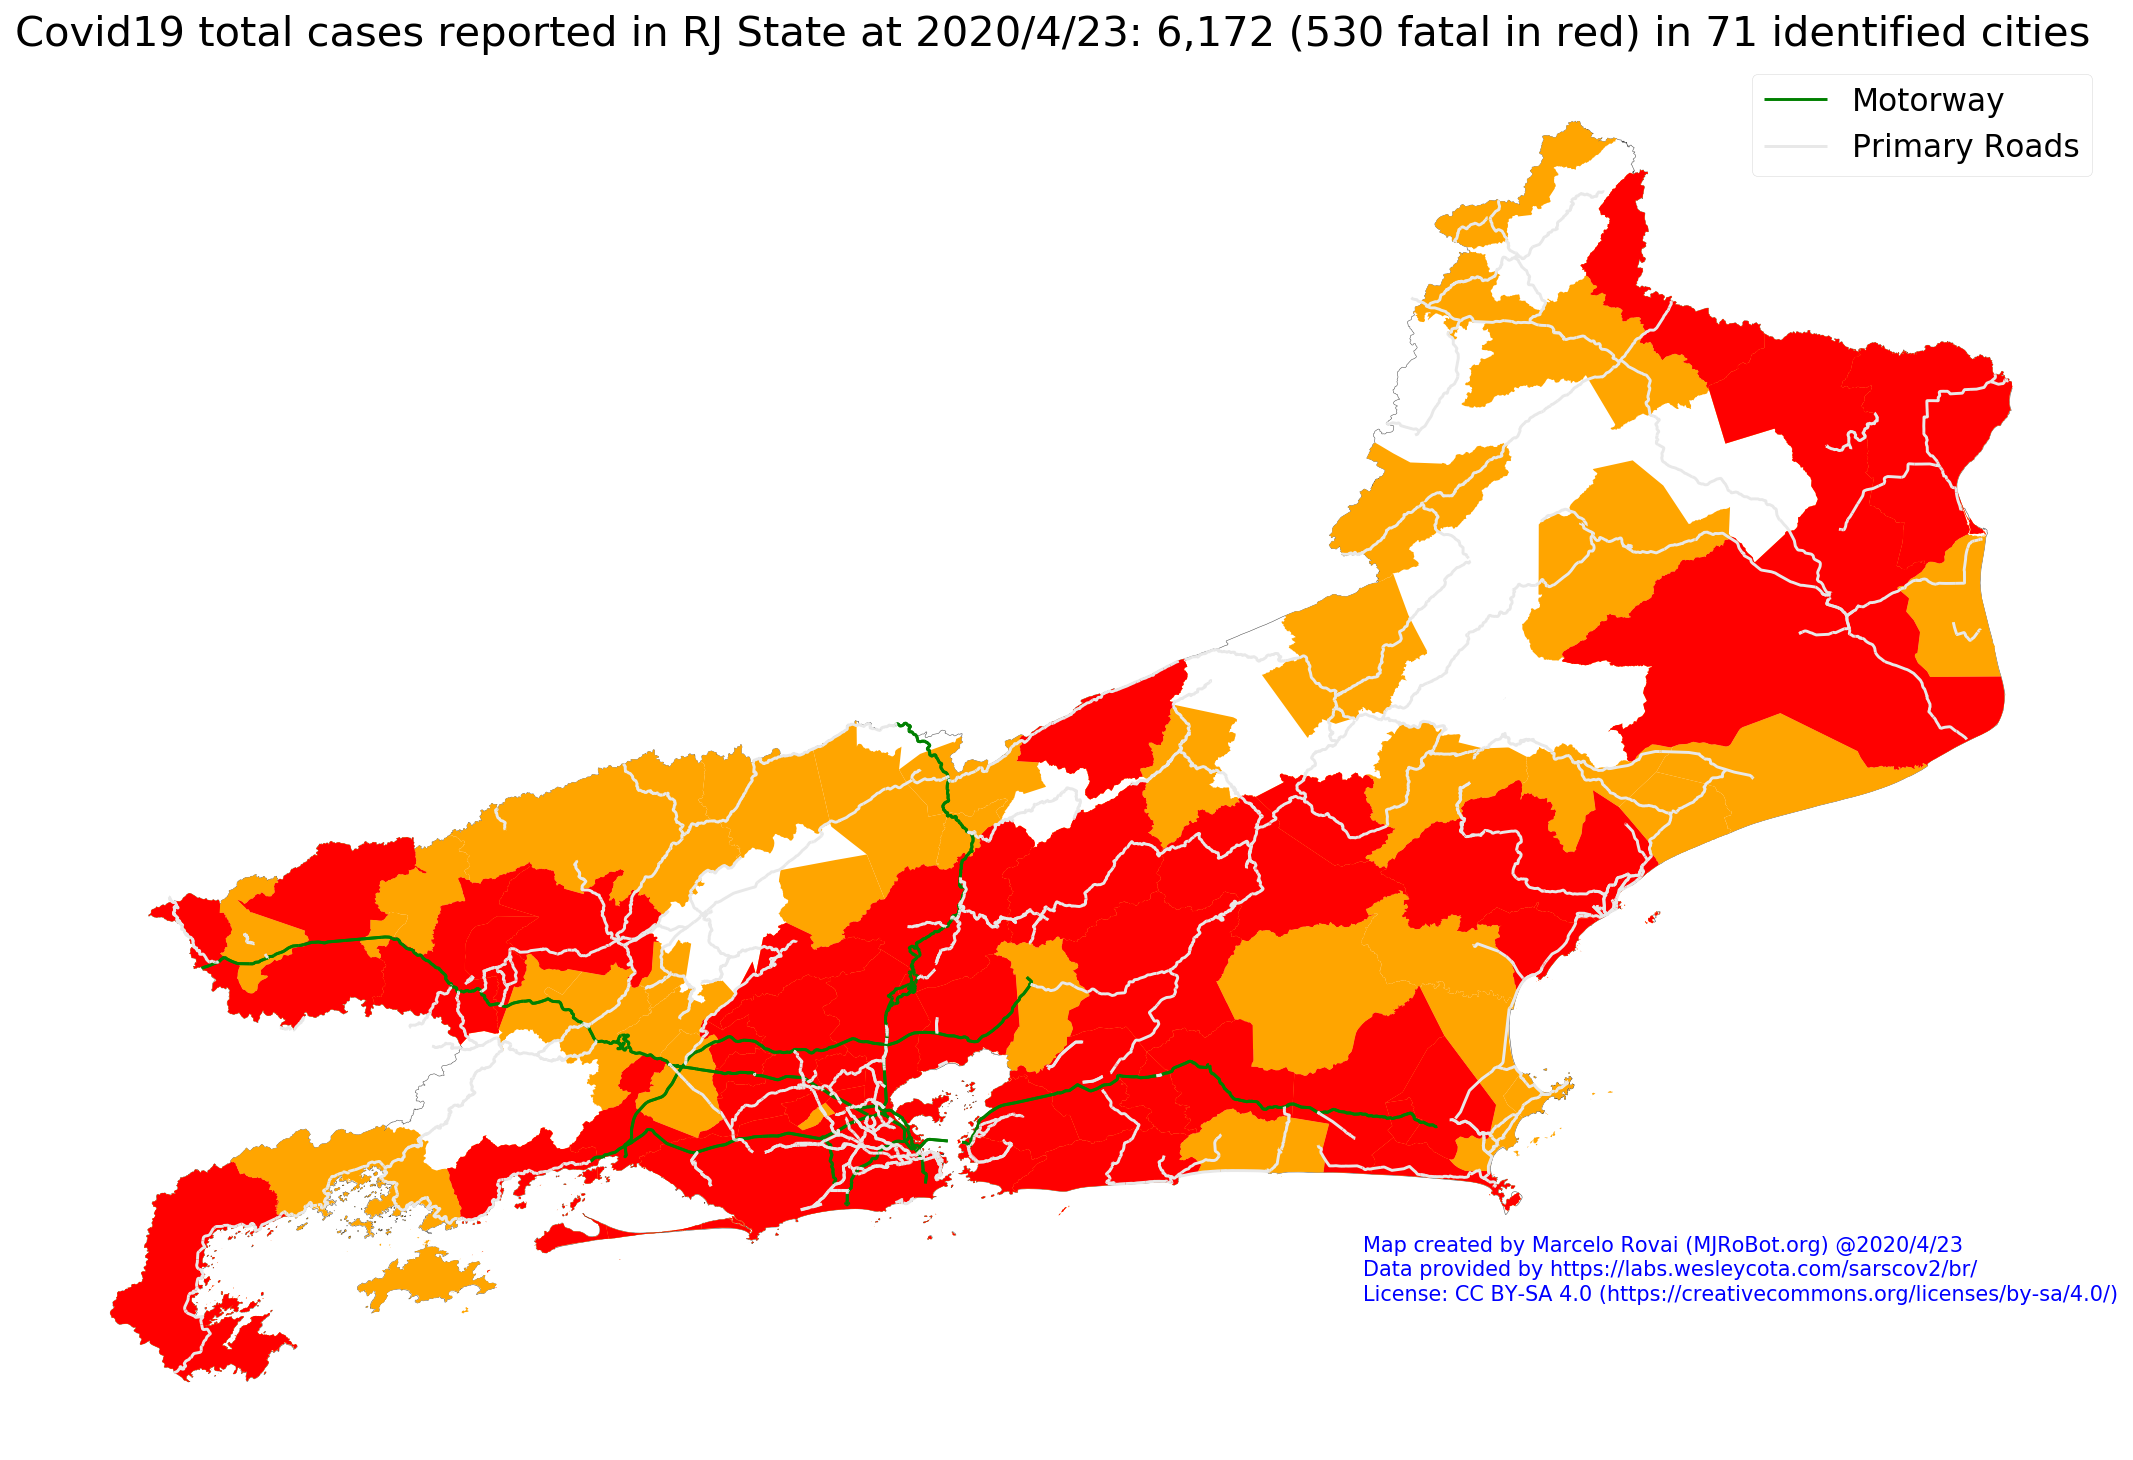

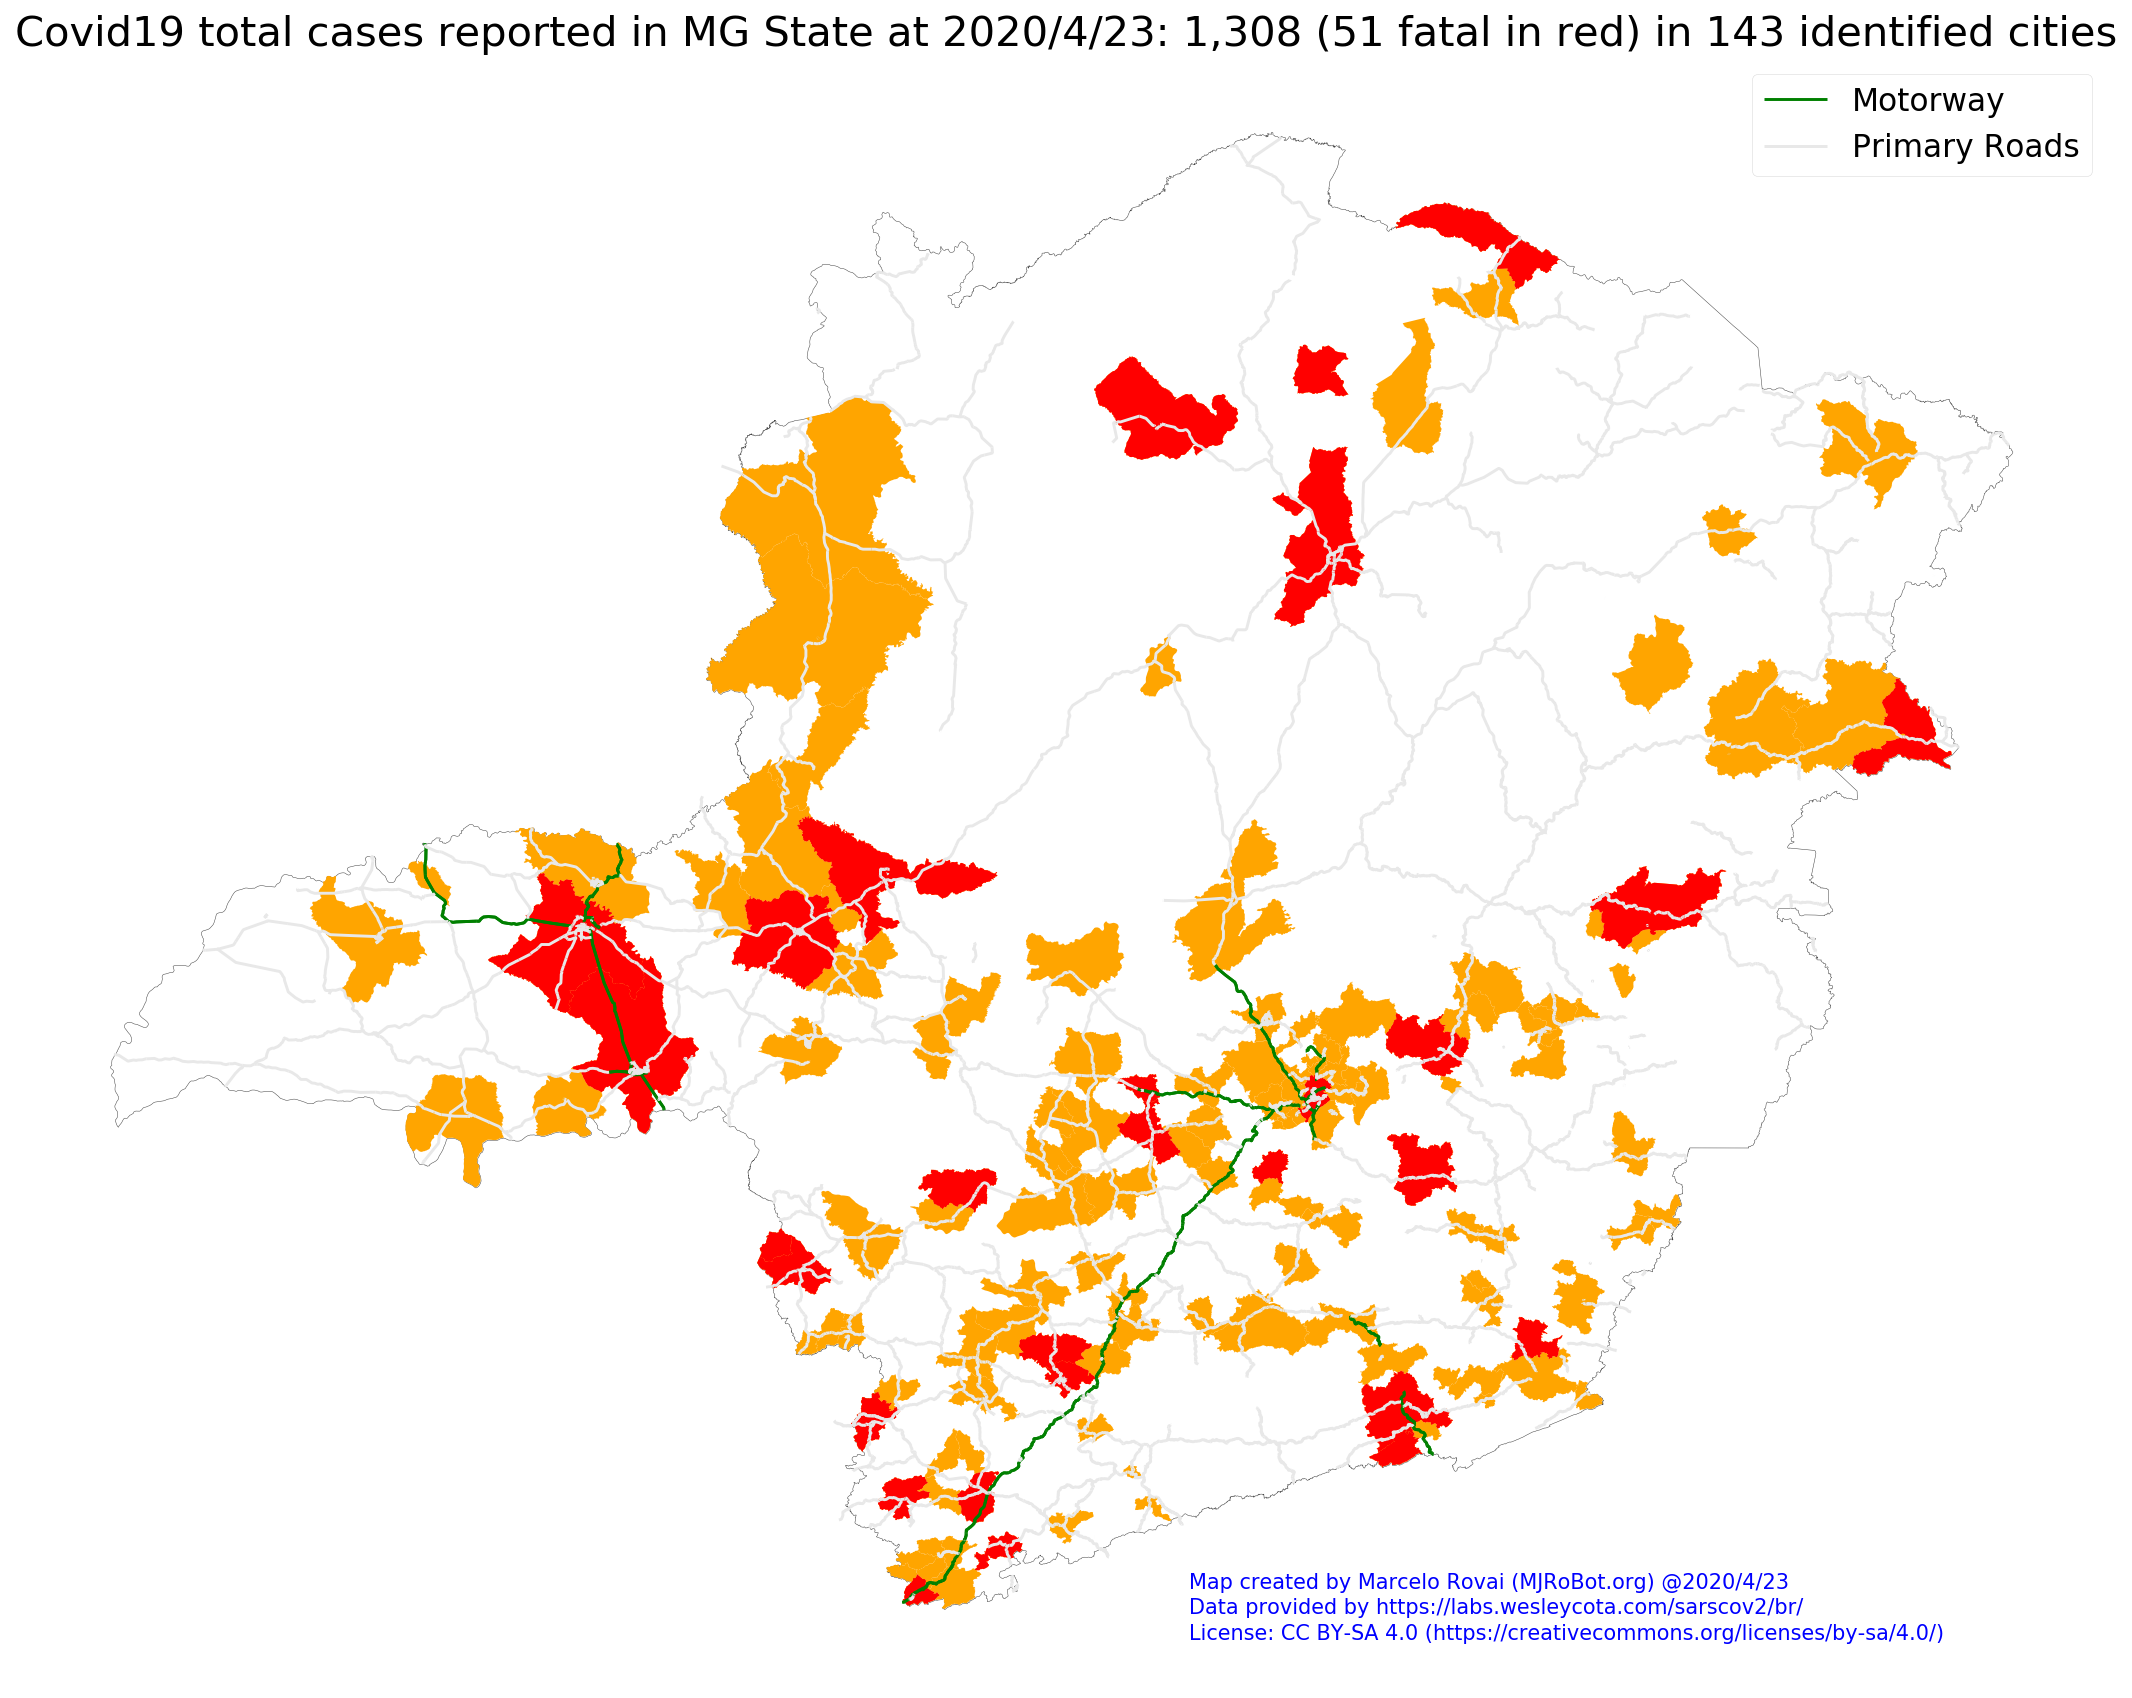

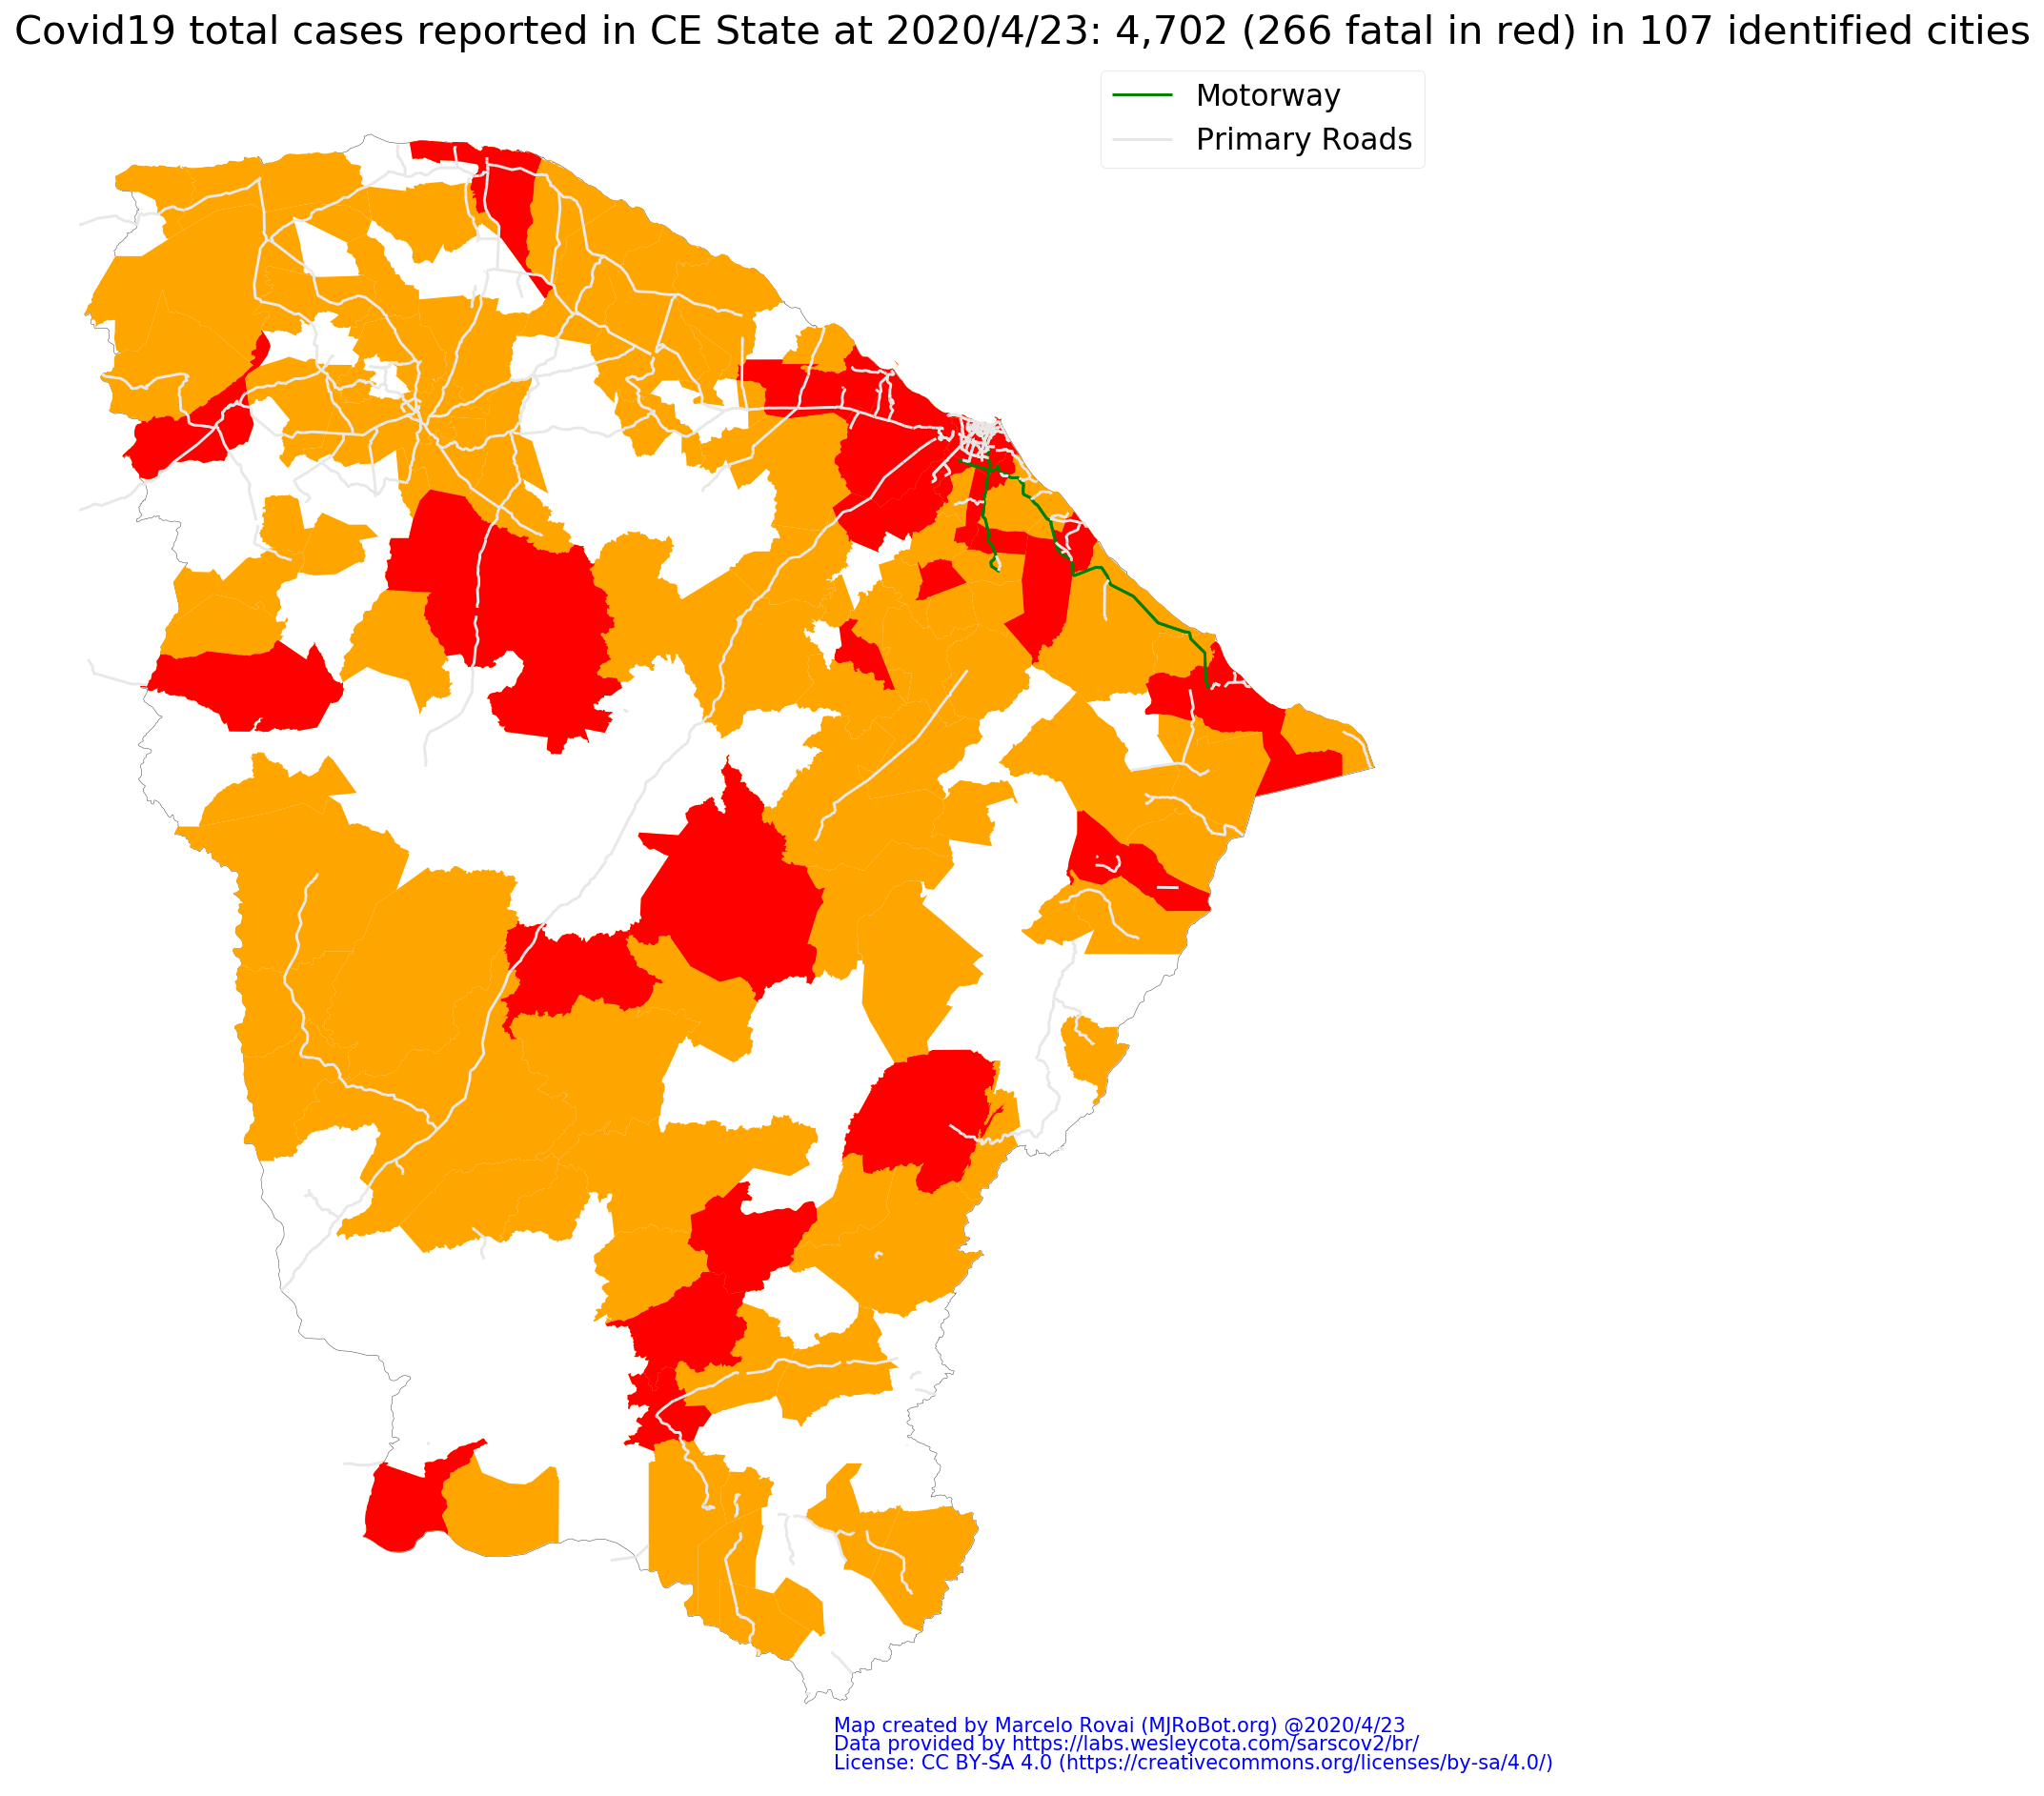

In [175]:
cv_rj, deaths_rj, rj_total_cases, rj_deaths = get_state_info(cv_city, dt_state, 'RJ')
cv_mg, deaths_mg, mg_total_cases, mg_deaths = get_state_info(cv_city, dt_state, 'MG')
cv_ce, deaths_ce, ce_total_cases, ce_deaths = get_state_info(cv_city, dt_state, 'CE')

## Creating  GIFs

In [208]:
cv_city_t = pd.merge(br_cities, dt_tm_city, on='COD. IBGE')
deaths_city_t = cv_city_t.loc[cv_city_t['deaths'] != 0].copy()
dates = list(set(cv_city_t.date))
dates.sort()

In [196]:
dates = dates[-3:]

In [197]:
# For updating after first time
dates

['2020-04-21', '2020-04-22', '2020-04-23']

In [ ]:
create_state_gif(dates, cv_city_t, deaths_city_t, 'BR')

In [ ]:
create_state_gif(dates, cv_city_t, deaths_city_t, 'SP')

In [ ]:
create_state_gif(dates, cv_city_t, deaths_city_t, 'RJ')

In [ ]:
create_state_gif(dates, cv_city_t, deaths_city_t, 'MG')

In [ ]:
create_state_gif(dates, cv_city_t, deaths_city_t, 'CE')